#**EDA to Prediction(DieTanic)**

https://www.kaggle.com/code/ash316/eda-to-prediction-dietanic


###Content

Part 1 : Exploratory Data Analysis (EDA)
- Analysis of features
- Finding any relations or trends considering multiple features

Part 2 : Feature Engineering and Data Cleaning
- Adding any few features
- Removing redundant feautures
- Converting features into suitable form for modeling

Part 3 : Predictive Modeling
- Running basic algorithms
- Cross validation
- Ensembling
- Extracting important features


##Part 1 : Exploratory Data Analysis (EDA)

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/ESAA_2024-2/DataSets/dietanic_train.csv')

In [ ]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
# Age, Cabin, Embarked features have null values.
data.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


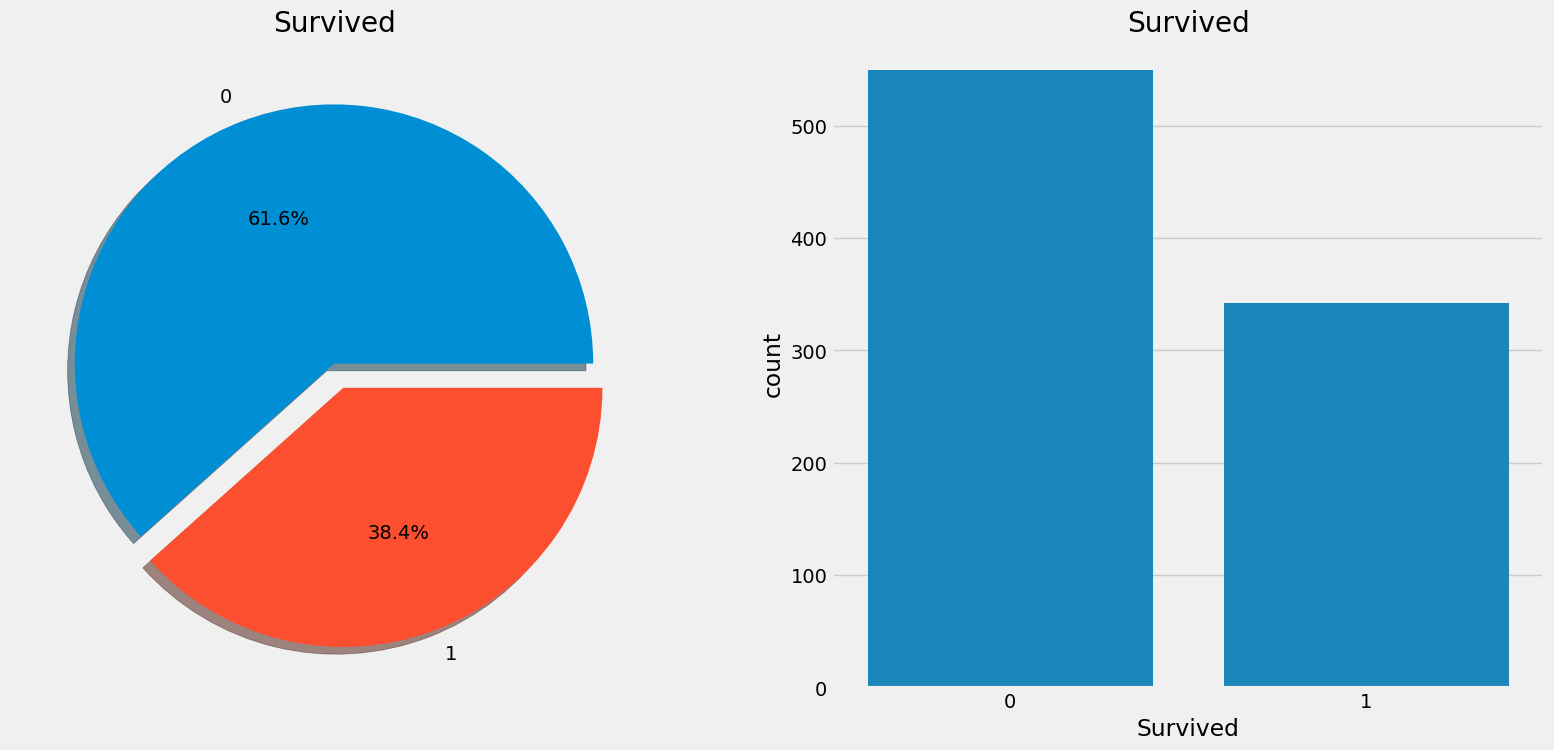

In [ ]:
# Only 38.4% of the total training set survived the crash.
f, ax = plt.subplots(1, 2, figsize=(18,8))
data['Survived'].value_counts().plot.pie(explode=[0, 0.1], autopct='%1.1f%%', ax=ax[0], shadow=True)
ax[0].set_title('Survived')
ax[0].set_ylabel('')
sns.countplot(x='Survived', data=data, ax=ax[1])
ax[1].set_title('Survived')
plt.show()

### Analysis of Features

**Types of Features**
- Categorical(Nominal) Features: Sex, Embarked
- Ordinal Features: Pclass
- Continuous Features: Age
- Discrete Features: SibSp, Parch


**# Sex (categorical feature)**

In [ ]:
data.groupby(['Sex', 'Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

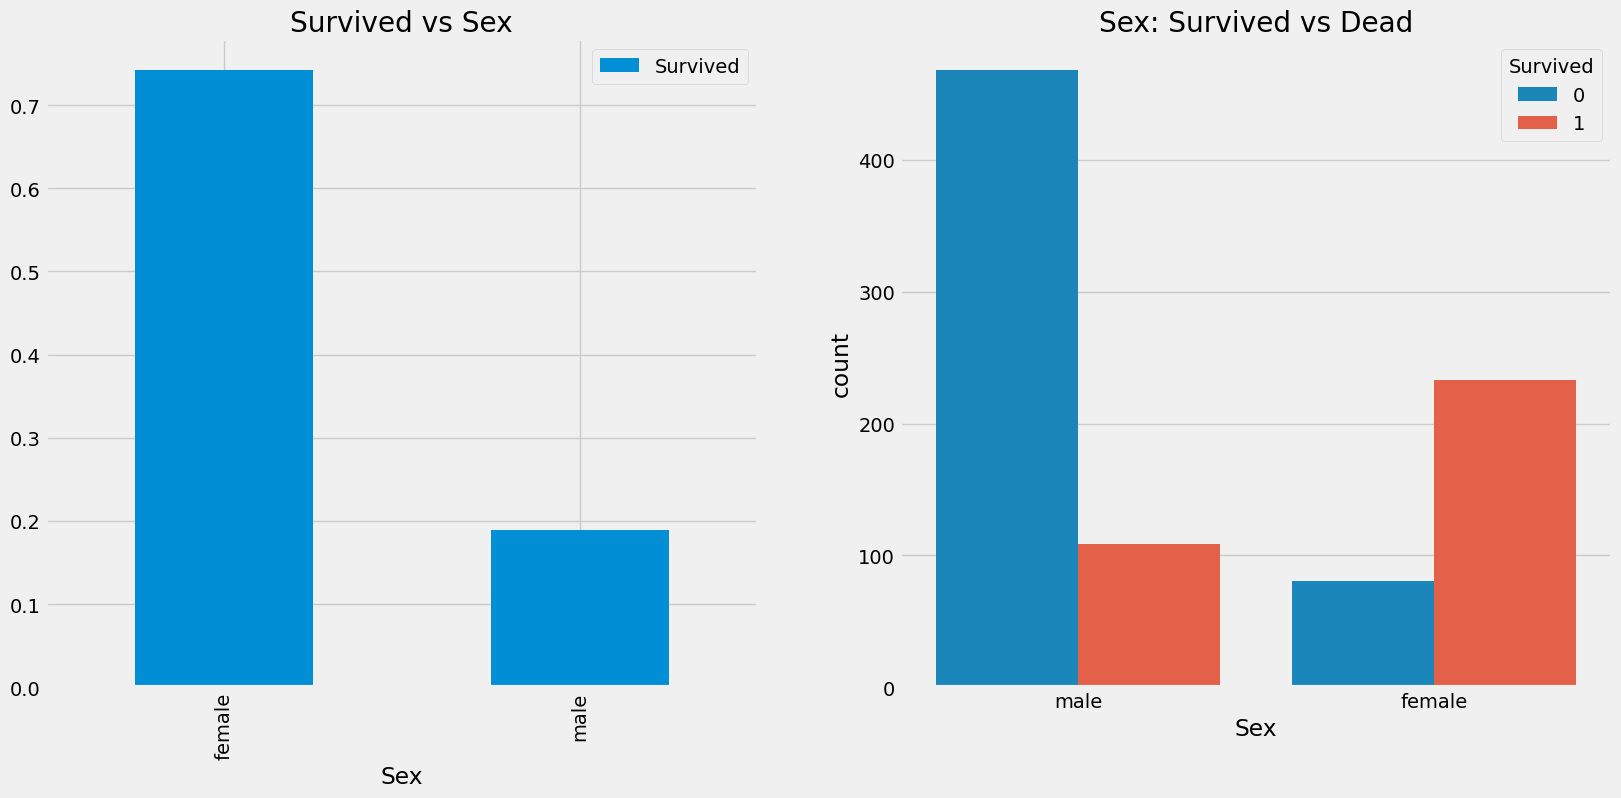

In [ ]:
f, ax = plt.subplots(1, 2, figsize=(18,8))
data[['Sex', 'Survived']].groupby(['Sex']).mean().plot.bar(ax=ax[0])
ax[0].set_title('Survived vs Sex')
sns.countplot(x='Sex', hue='Survived', data=data, ax=ax[1])
ax[1].set_title('Sex: Survived vs Dead')
plt.show()

전체 탑승객 중 남성이 여성보다 훨씬 많은데도, 생존한 여성이 생존한 남성보다 거의 2배 가까이 많음. 성별이 모델링에서의 중요한 피처인 듯 보임.

**# Pclass (ordinal feature)**

In [ ]:
pd.crosstab(data.Pclass, data.Survived, margins=True).style.background_gradient(cmap='summer_r')

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


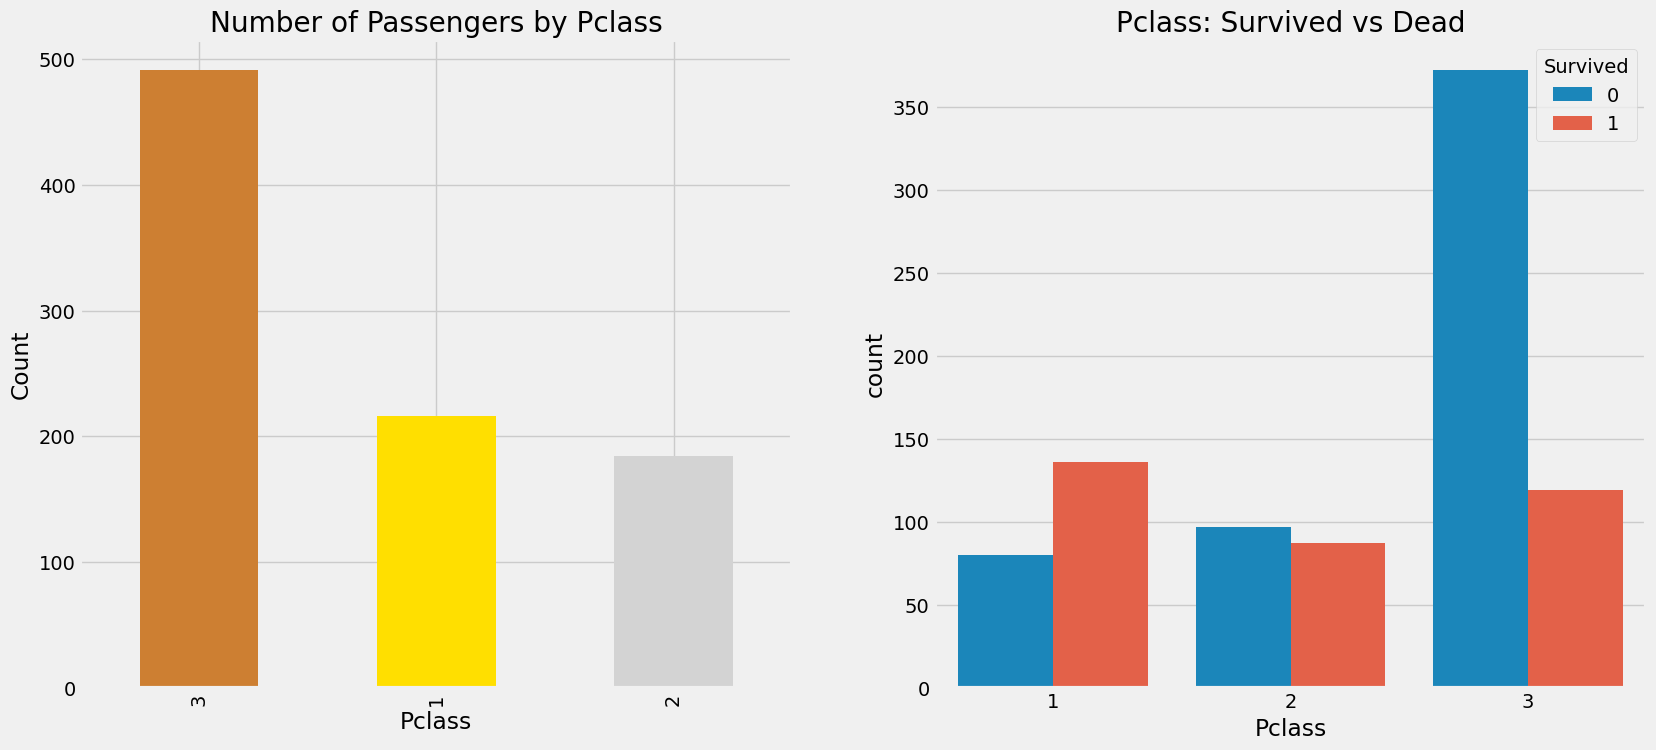

In [ ]:
f, ax = plt.subplots(1, 2, figsize=(18, 8))
data['Pclass'].value_counts().plot.bar(color=['#CD7F32','#FFDF00','#D3D3D3'], ax=ax[0])
ax[0].set_title('Number of Passengers by Pclass')
ax[0].set_ylabel('Count')
sns.countplot(x='Pclass', hue='Survived', data=data, ax=ax[1])
ax[1].set_title('Pclass: Survived vs Dead')
plt.show()

Even though the number of passengers in Pclass 3 were a lot higher than 1 and 2, only about 25% of them survived. The survival rate for Pclass 1 was around 63% and PClass 2 was around 48%. We can see that passengers of Pclass 1 were given a high priority while rescue.

**Sex and Pclass together**

In [ ]:
pd.crosstab([data.Sex, data.Survived], data.Pclass, margins=True).style.background_gradient(cmap='summer_r')

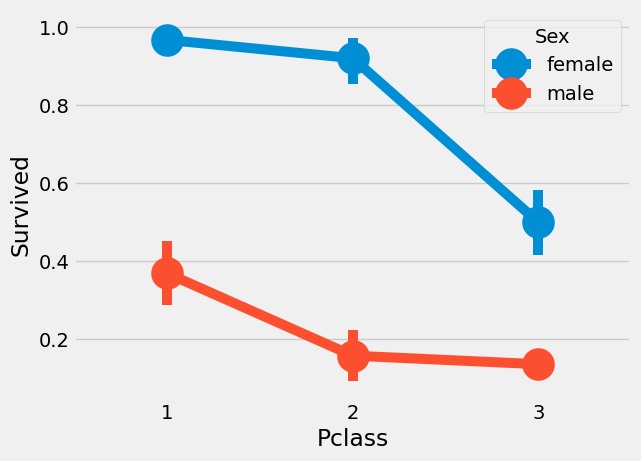

In [ ]:
# Catplot(factorplot/pointplot) makes the separation of categorical values easy.
sns.pointplot(x='Pclass', y='Survived', hue='Sex', data=data)
plt.show()

Even men from pclass1 have a very low survival rate. It is evident that women were given first priority while resue irrespective of pclass.

**# Age (continuous feature)**

In [ ]:
print('Oldest Passenger was of:', data['Age'].max(), 'Years')
print('Youngest Passenger was of:', data['Age'].min(), 'Years')
print('Average Age on the ship:', data['Age'].mean(), 'Years')

Oldest Passenger was of: 80.0 Years
Youngest Passenger was of: 0.42 Years
Average Age on the ship: 29.69911764705882 Years


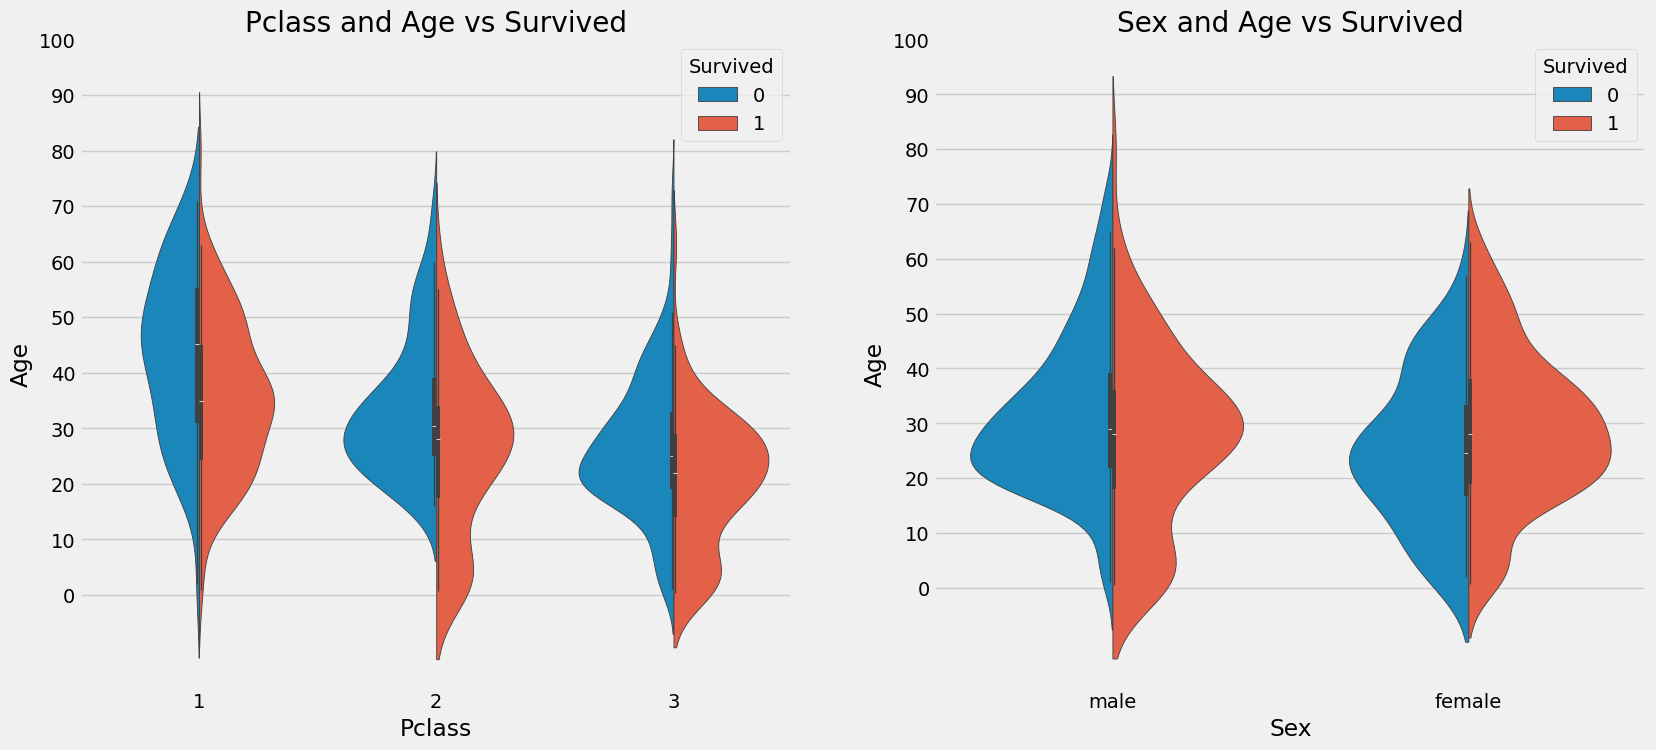

In [ ]:
f, ax = plt.subplots(1, 2, figsize=(18, 8))
sns.violinplot(x='Pclass', y='Age', hue='Survived', data=data, split=True, ax=ax[0])
ax[0].set_title('Pclass and Age vs Survived')
ax[0].set_yticks(range(0, 110, 10))
sns.violinplot(x='Sex', y='Age', hue='Survived', data=data, split=True, ax=ax[1])
ax[1].set_title('Sex and Age vs Survived')
ax[1].set_yticks(range(0, 110, 10))
plt.show()

- Pclass가 증가할수록 아이들의 수도 증가하는데, 특히 10세 이하의 아이들은  Pclass에 상관없이 생존확률이 높았다.
- Pclass의 20~50세 승객들의 생존확률이 높았다. 이 중에서도 특히 여성의 생존확률이 높았다.
- 남성의 경우, 나이가 높을수록 생존확률이 감소하였다.

**Fill NaN values in Age feature**

In [ ]:
# Extract strings which lie between A-Z or a-z and followed by a .(dot)
data['Initial'] = 0
for i in data:
  data['Initial'] = data.Name.str.extract('([A-Za-z]+)\.')

In [ ]:
# Checking the initials with Sex
pd.crosstab(data.Initial, data.Sex).T.style.background_gradient(cmap='summer_r')

Initial,Capt,Col,Countess,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir
Sex,,,,,,,,,,,,,,,,,
female,0,0,1,0,1,0,1,0,0,182,2,1,0,125,1,0,0
male,1,2,0,1,6,1,0,2,40,0,0,0,517,0,0,6,1


In [ ]:
# Replace misspelled initials like Mlle or Mme for Miss
data['Initial'].replace(['Capt', 'Col', 'Countess', 'Don', 'Dr', 'Jonkheer', 'Lady', 'Major', 'Mlle', 'Mme', 'Ms', 'Rev', 'Sir'],
                         ['Mr', 'Other', 'Mrs', 'Mr', 'Mr', 'Other', 'Mrs', 'Mr', 'Miss', 'Miss', 'Miss', 'Other', 'Mr'], inplace=True)

In [ ]:
# Checking the average age per Initial
data.groupby('Initial').Age.mean()

,Age
Initial,
Master,4.574167
Miss,21.860000
Mr,32.739609
Mrs,35.981818
Other,45.888889


In [ ]:
# Assigning the NaN values with the average age of each Initial
data.loc[(data.Age.isnull())&(data.Initial=='Mr'), 'Age'] = 33
data.loc[(data.Age.isnull())&(data.Initial=='Mrs'), 'Age'] = 36
data.loc[(data.Age.isnull())&(data.Initial=='Master'), 'Age'] = 5
data.loc[(data.Age.isnull())&(data.Initial=='Miss'), 'Age'] = 22
data.loc[(data.Age.isnull())&(data.Initial=='Other'), 'Age'] = 46

In [ ]:
data.Age.isnull().any() # No null values left

False

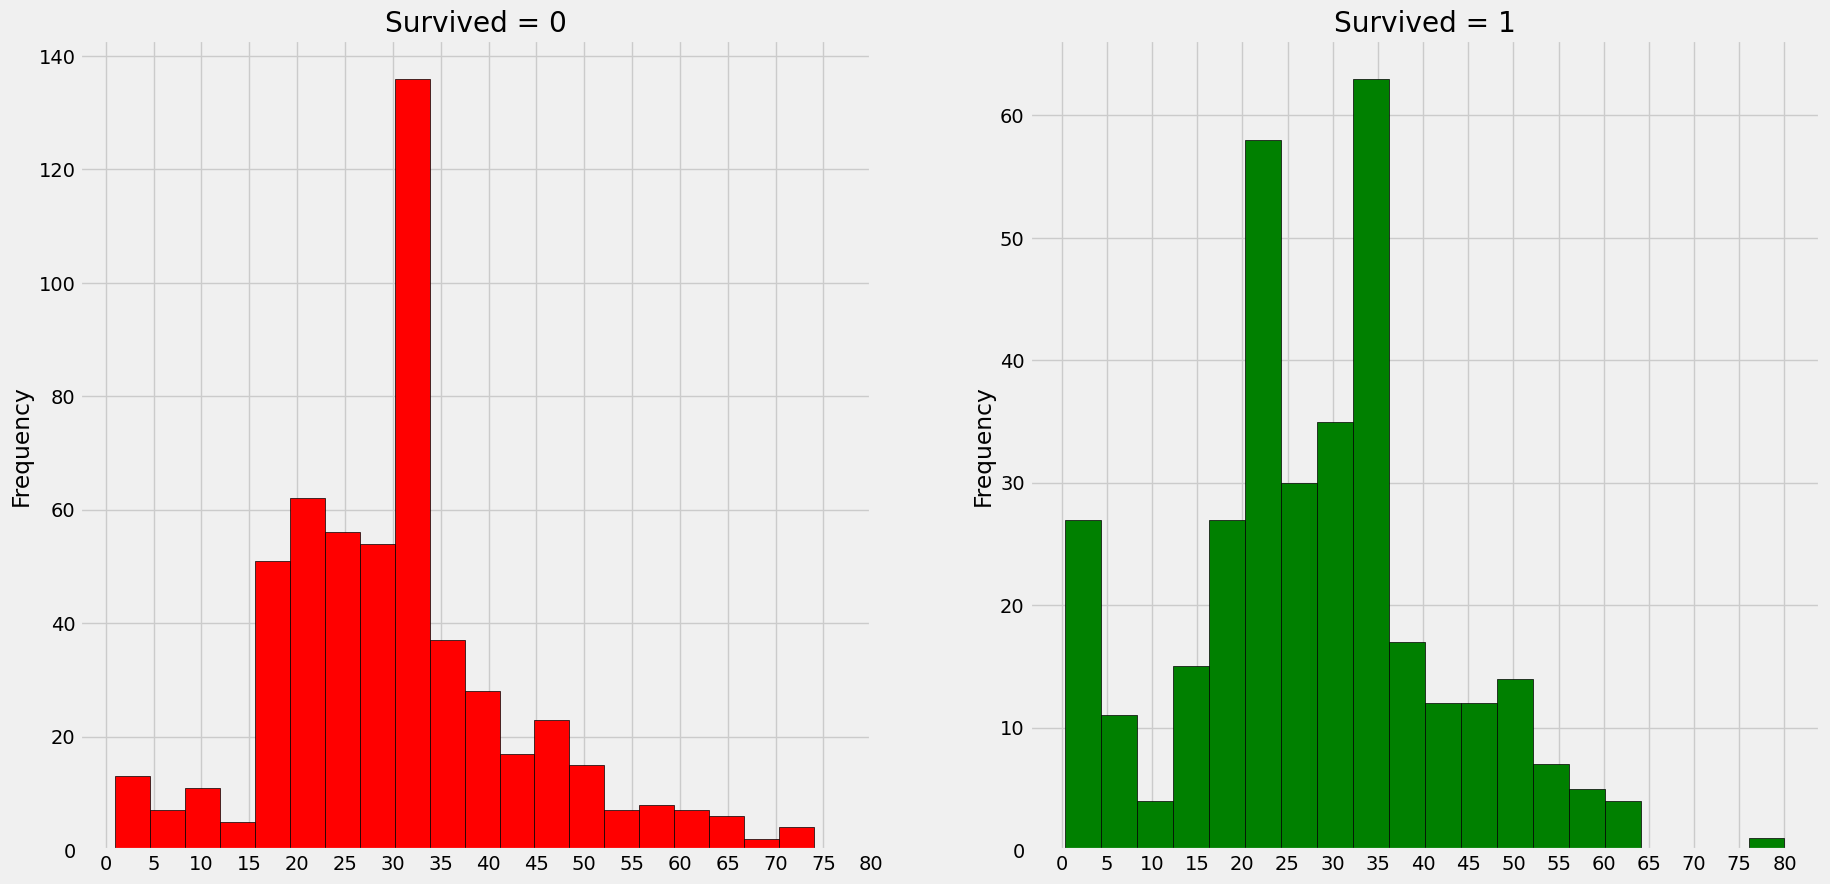

In [ ]:
f, ax = plt.subplots(1, 2, figsize=(20, 10))
data[data['Survived']==0].Age.plot.hist(ax=ax[0], bins=20, edgecolor='black', color='red')
ax[0].set_title('Survived = 0')
ax[0].set_xticks(range(0, 85, 5))
data[data['Survived']==1].Age.plot.hist(ax=ax[1], bins=20, edgecolor='black', color='green')
ax[1].set_title('Survived = 1')
ax[1].set_xticks(range(0, 85, 5))
plt.show()

- Toddlers(age<5) were saved in large numbers.
- The oldest passenger(80 years) was saved.
- Maximum number of deaths were in age group 30-40.

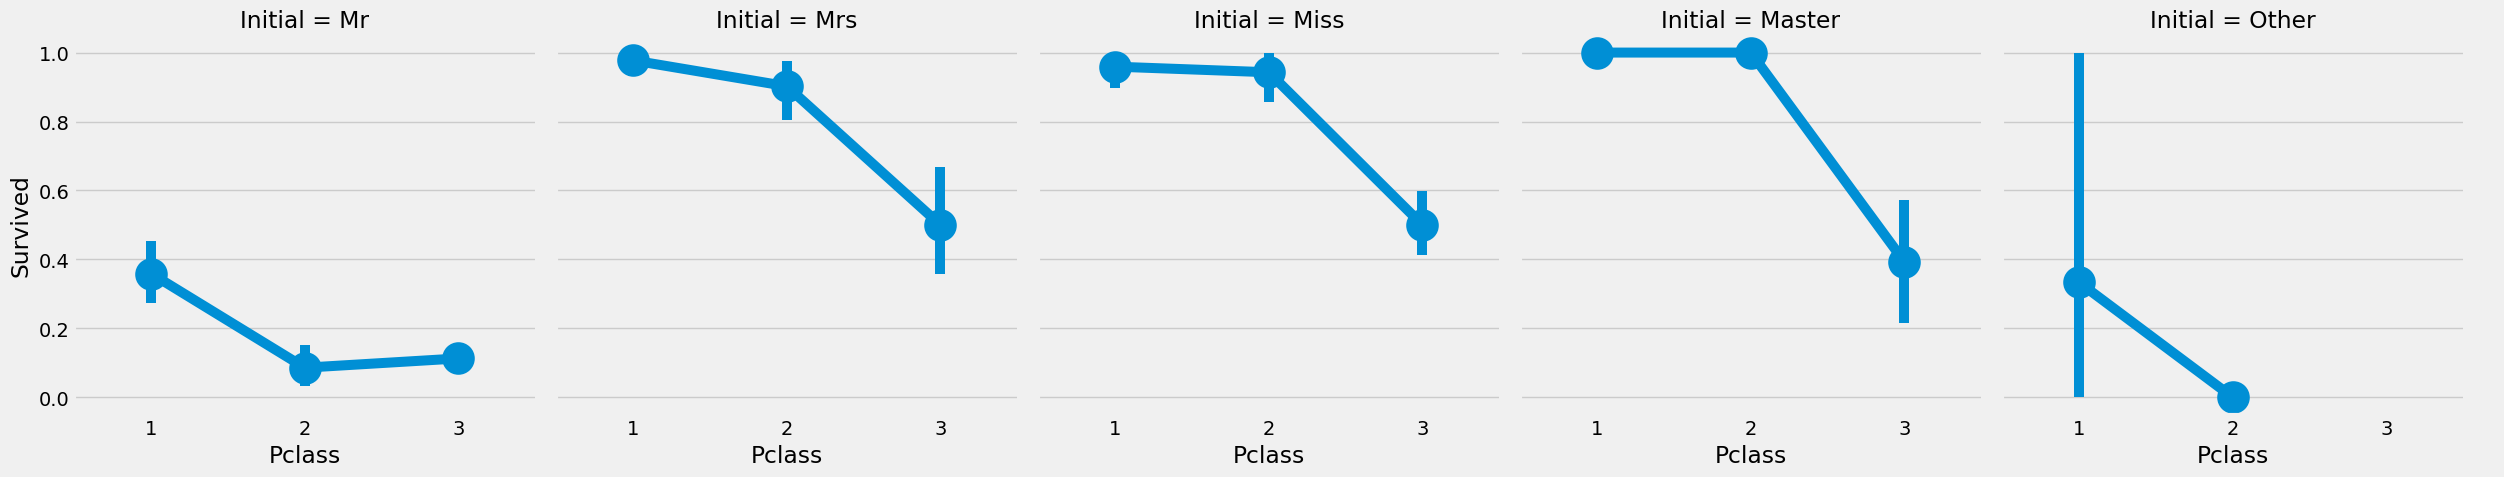

In [ ]:
sns.catplot(x='Pclass', y='Survived', col='Initial', data=data, kind='point')
plt.show()

Mrs, Miss, Master initial groups show high survival rate. Women and child first policy holds true irrespective of class.

**# Embarked (categorical feature)**

In [ ]:
pd.crosstab([data.Embarked, data.Pclass], [data.Sex, data.Survived], margins=True).style.background_gradient(cmap='summer_r')

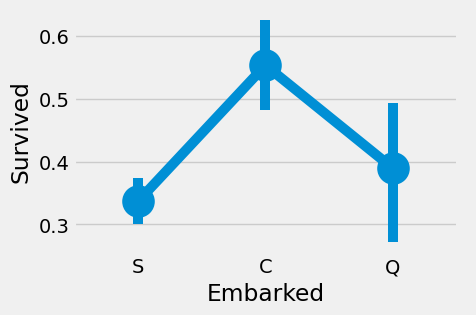

In [ ]:
# Chance of survival is the highest for Port C (around 0.55) and the lowest for Port S.
sns.catplot(x='Embarked', y='Survived', data=data, kind='point')
fig = plt.gcf()
fig.set_size_inches(5, 3)
plt.show()

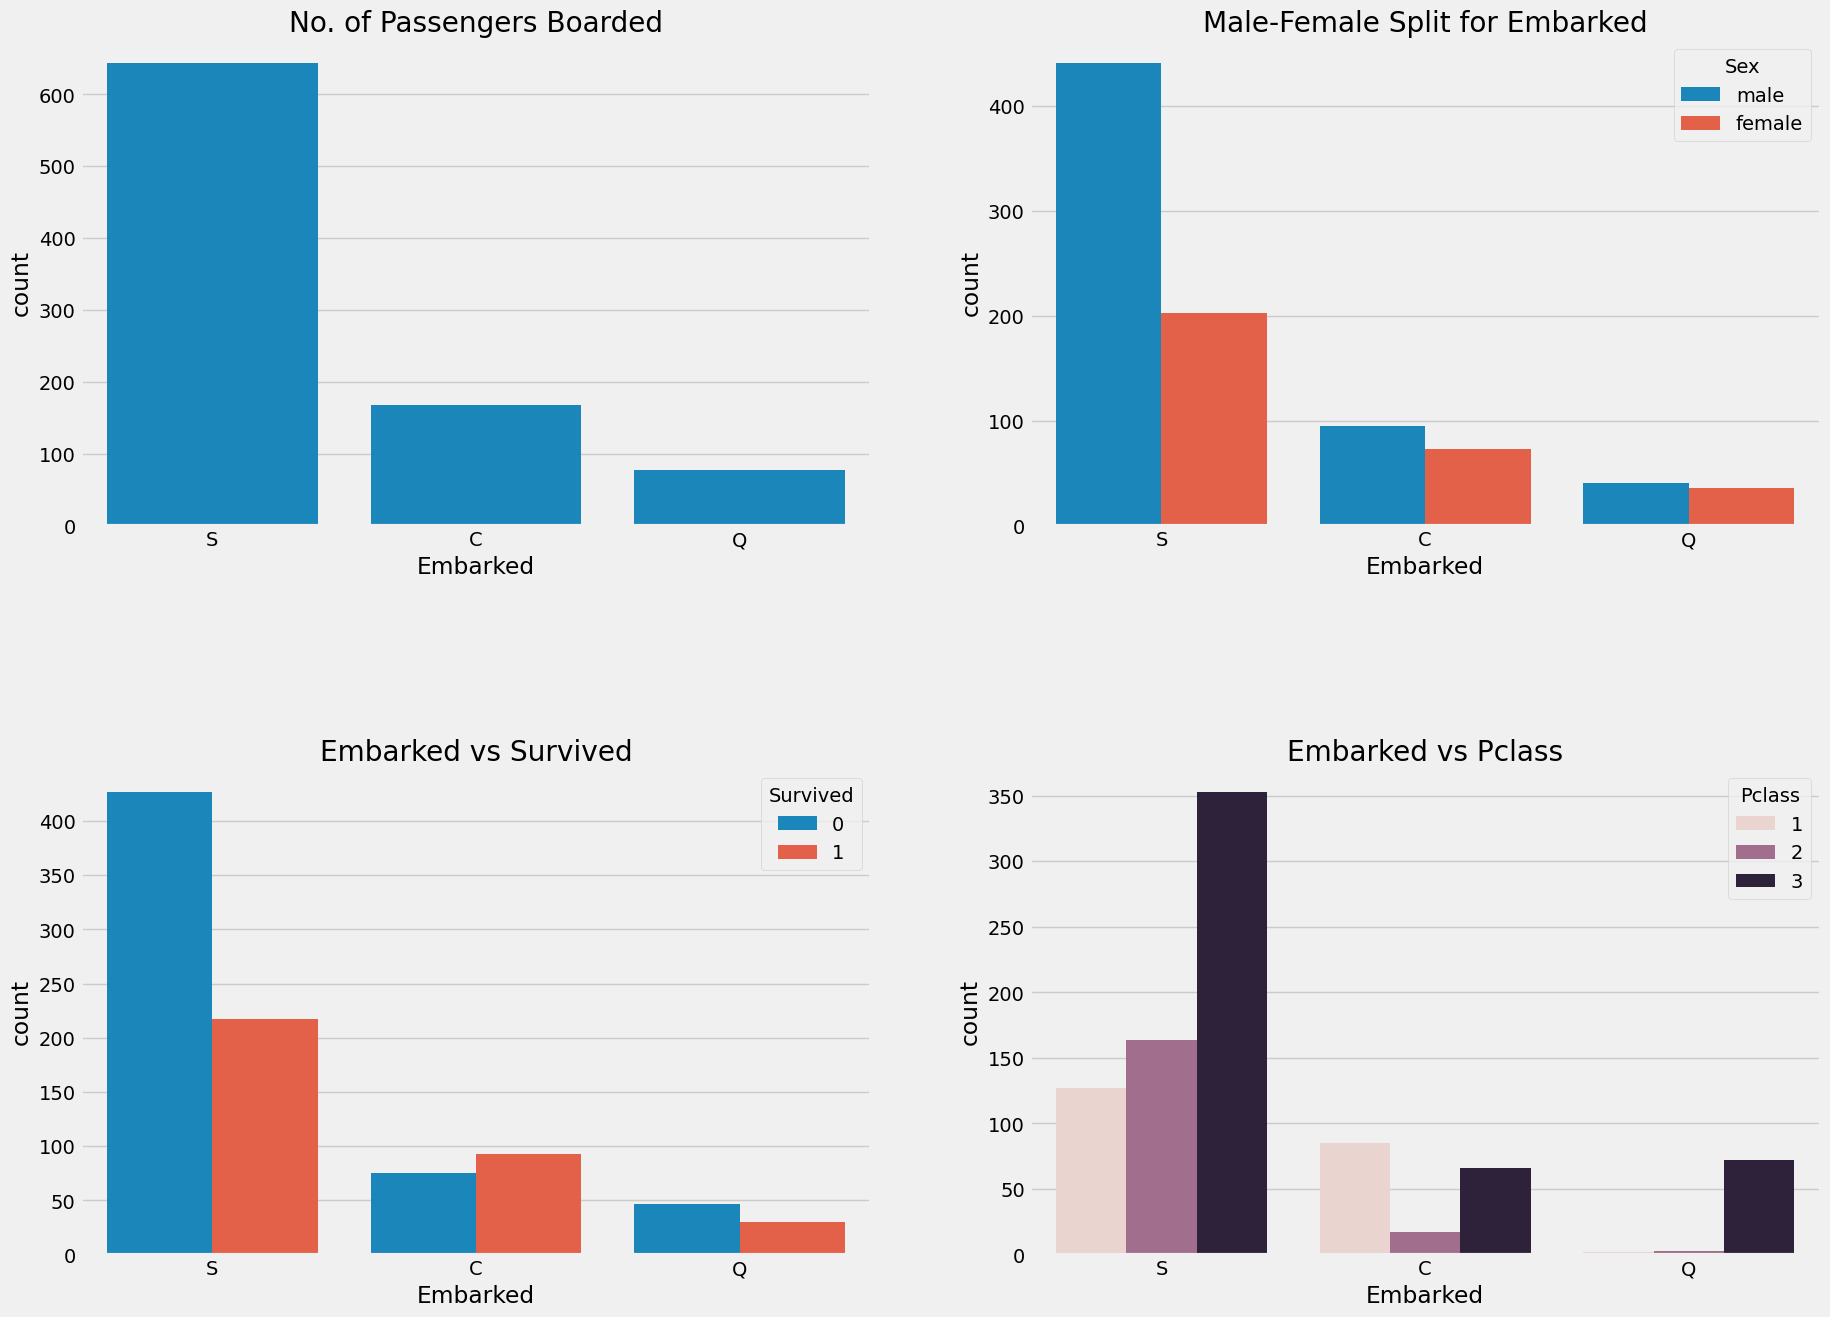

In [ ]:
# Majority passengers boarded from S, majority of them being from Pclass 3.
# A good proportion of passengers survived from Embark C.
# Almost 95% of the passengers in Port Q were from Pclass 3.
f, ax = plt.subplots(2, 2, figsize=(20, 15))
sns.countplot(x='Embarked', data=data, ax=ax[0,0])
ax[0,0].set_title('No. of Passengers Boarded')
sns.countplot(x='Embarked', hue='Sex', data=data, ax=ax[0,1])
ax[0,1].set_title('Male-Female Split for Embarked')
sns.countplot(x='Embarked', hue='Survived', data=data, ax=ax[1,0])
ax[1,0].set_title('Embarked vs Survived')
sns.countplot(x='Embarked', hue='Pclass', data=data, ax=ax[1,1])
ax[1,1].set_title('Embarked vs Pclass')
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

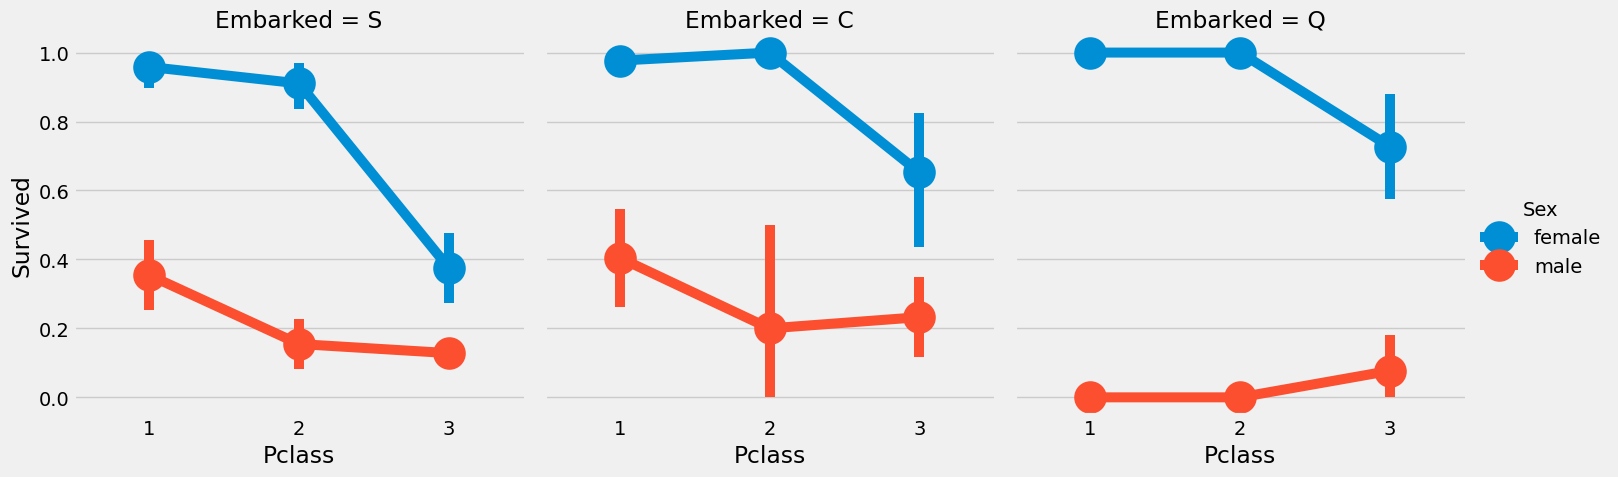

In [ ]:
# Suvival chances were almost 1 for women in Pclass 1 and 2, irrespective of port.
# Survival rate for passengers in Port S, Pclass 3 were especially low.
# Port Q seems the unluckiest for men.
sns.catplot(x='Pclass', y='Survived', hue='Sex', col='Embarked', data=data, kind='point')
plt.show()

**Filling NaN values in Embarked feature**

In [ ]:
# As maximum of passengers boarded from port S, we replace Embarked's NaN values with S.
data['Embarked'].fillna('S', inplace=True)

In [ ]:
# Now no NaN values
data['Embarked'].isna().any()

False

**# SibSp (discrete feature)**

: Number of family members the person had with on board (Sibling + Spouse)

In [ ]:
pd.crosstab(data.SibSp, data.Survived).style.background_gradient(cmap='summer_r')

Survived,0,1
SibSp,,
0,398,210
1,97,112
2,15,13
3,12,4
4,15,3
5,5,0
8,7,0


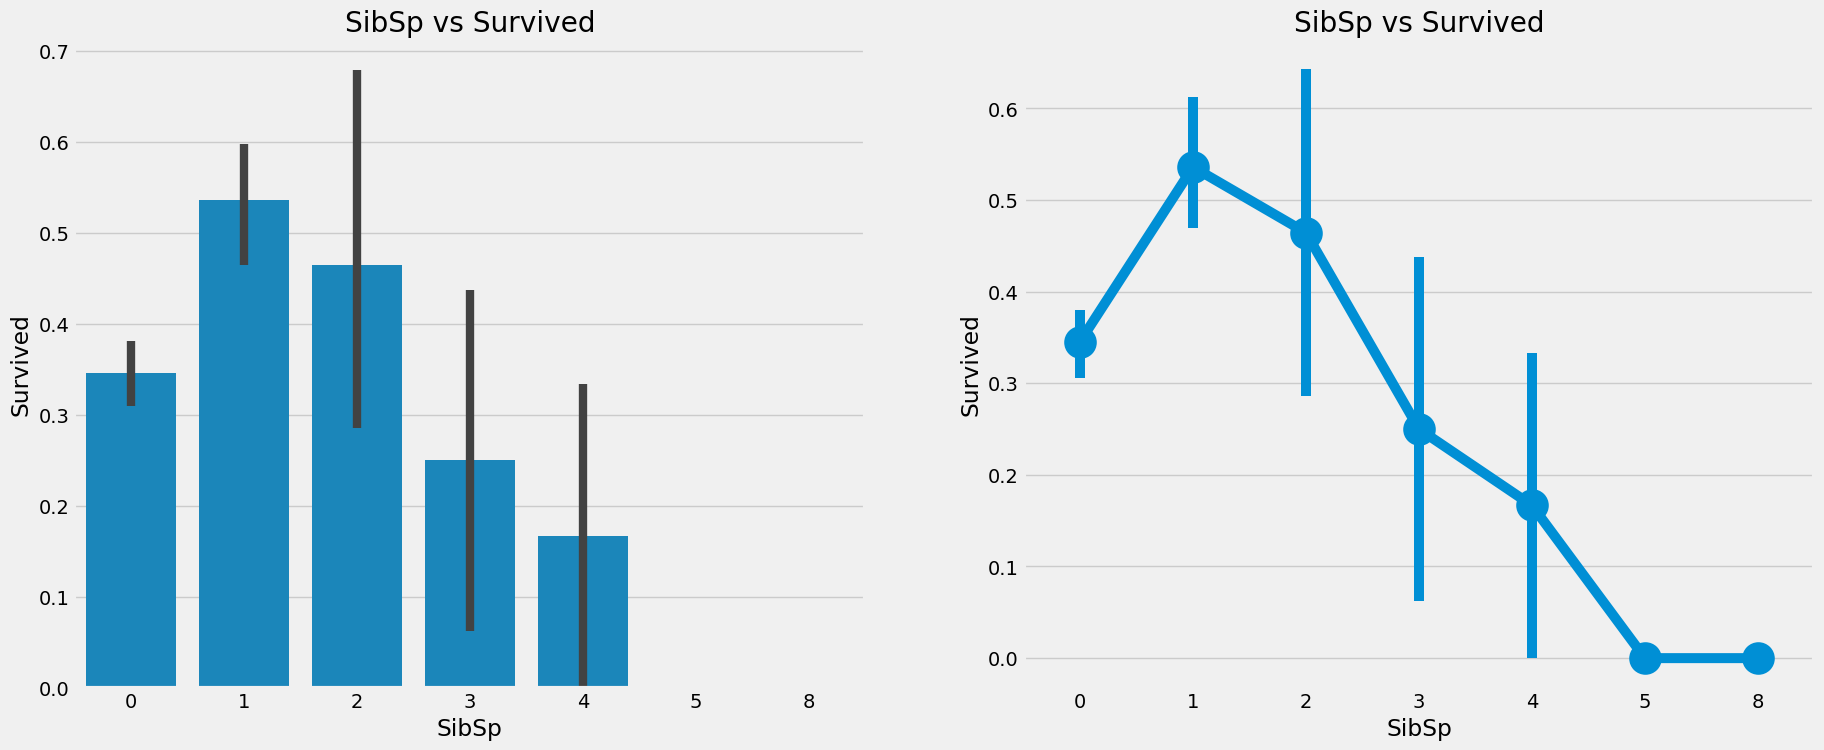

In [ ]:
# Passengers alone had a survival rate of 34.5%.
# The survival rate roughly decreases as the number of siblings increases.
# Survival rate for 5-8 family members was 0%.
f, ax = plt.subplots(1, 2, figsize=(20, 8))
sns.barplot(x='SibSp', y='Survived', data=data, ax=ax[0])
ax[0].set_title('SibSp vs Survived')
sns.pointplot(x='SibSp', y='Survived', data=data, ax=ax[1])
ax[1].set_title('SibSp vs Survived')
plt.close(2)
plt.show()

In [ ]:
# Passengers with SibSp>3 were all in Pclass 3. As most passengers in Pclass 3 did not survive, it is imminent that all large families in Pclass 3 died.
pd.crosstab(data.SibSp, data.Pclass).style.background_gradient(cmap='summer_r')

Pclass,1,2,3
SibSp,,,
0,137,120,351
1,71,55,83
2,5,8,15
3,3,1,12
4,0,0,18
5,0,0,5
8,0,0,7


**# Parch (discrete feature)**

: Number of parents the passenger had with on board

In [ ]:
# Large families were in Pclass 3.
pd.crosstab(data.Parch, data.Pclass).style.background_gradient(cmap='summer_r')

Pclass,1,2,3
Parch,,,
0,163,134,381
1,31,32,55
2,21,16,43
3,0,2,3
4,1,0,3
5,0,0,5
6,0,0,1


Text(0.5, 1.0, 'Parch vs Survived')

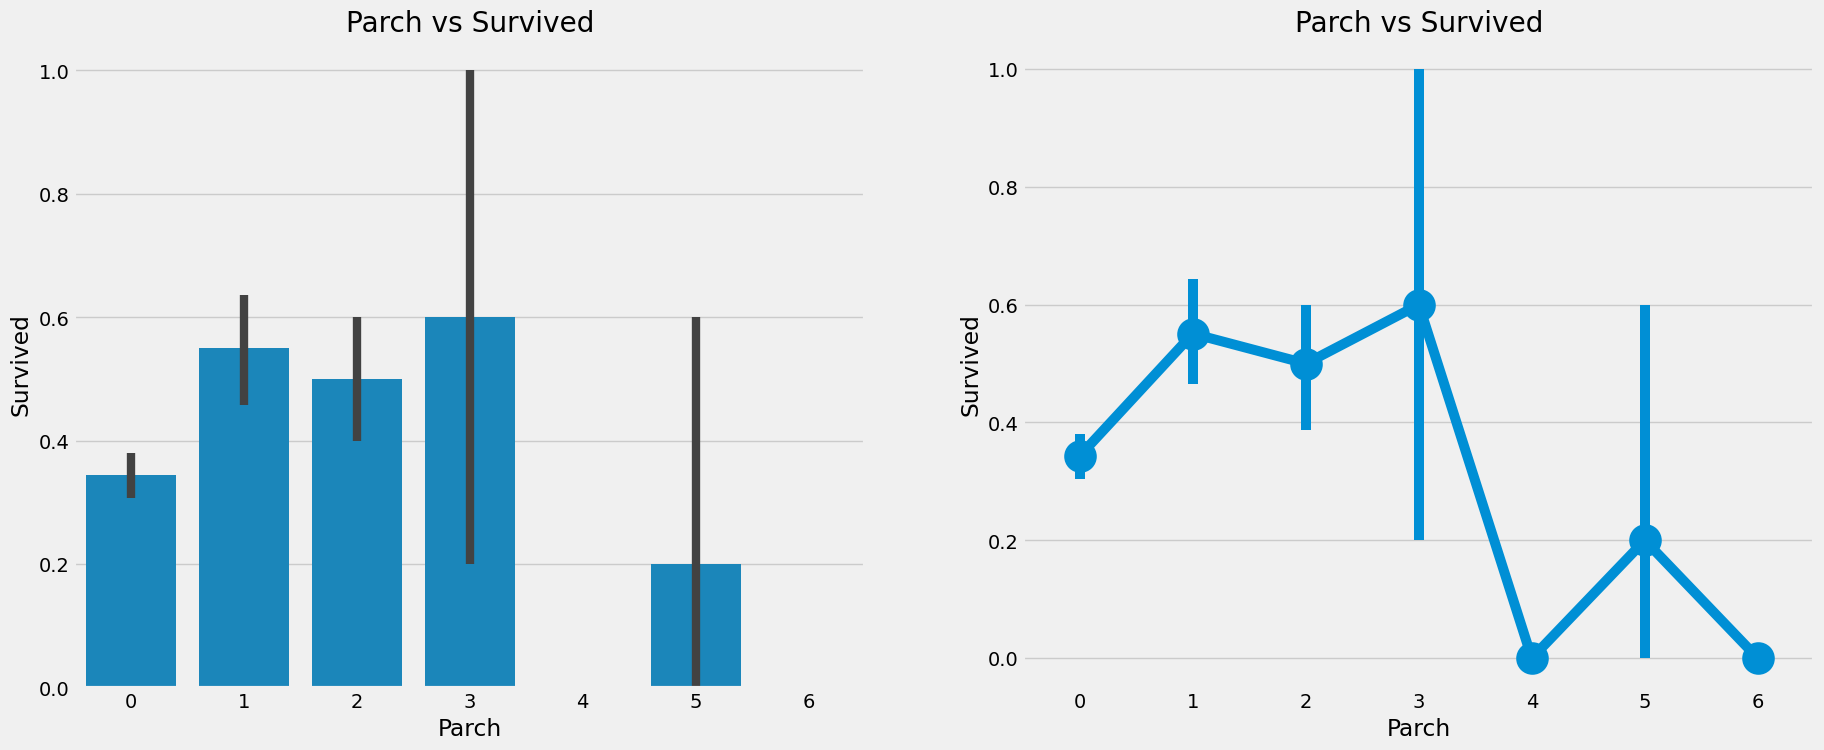

In [ ]:
# 1-3명의 부모를 가진 승객의 생존확률이 높았음.
# 혼자이거나, 4명 이상의 부모를 가진 승객은 생존확률이 낮음.
f, ax = plt.subplots(1, 2, figsize=(20, 8))
sns.barplot(x='Parch', y='Survived', data=data, ax=ax[0])
ax[0].set_title('Parch vs Survived')
sns.pointplot(x='Parch', y='Survived', data=data, ax=ax[1])
ax[1].set_title('Parch vs Survived')

**# Fare (continuous feature)**

In [ ]:
print('Highest Fare was:', data['Fare'].max())
print('Lowest Fare was:', data['Fare'].min())
print('Average Fare was:', data['Fare'].mean())

Highest Fare was: 512.3292
Lowest Fare was: 0.0
Average Fare was: 32.204207968574636


Text(0.5, 1.0, 'Fares in Pclass 3')

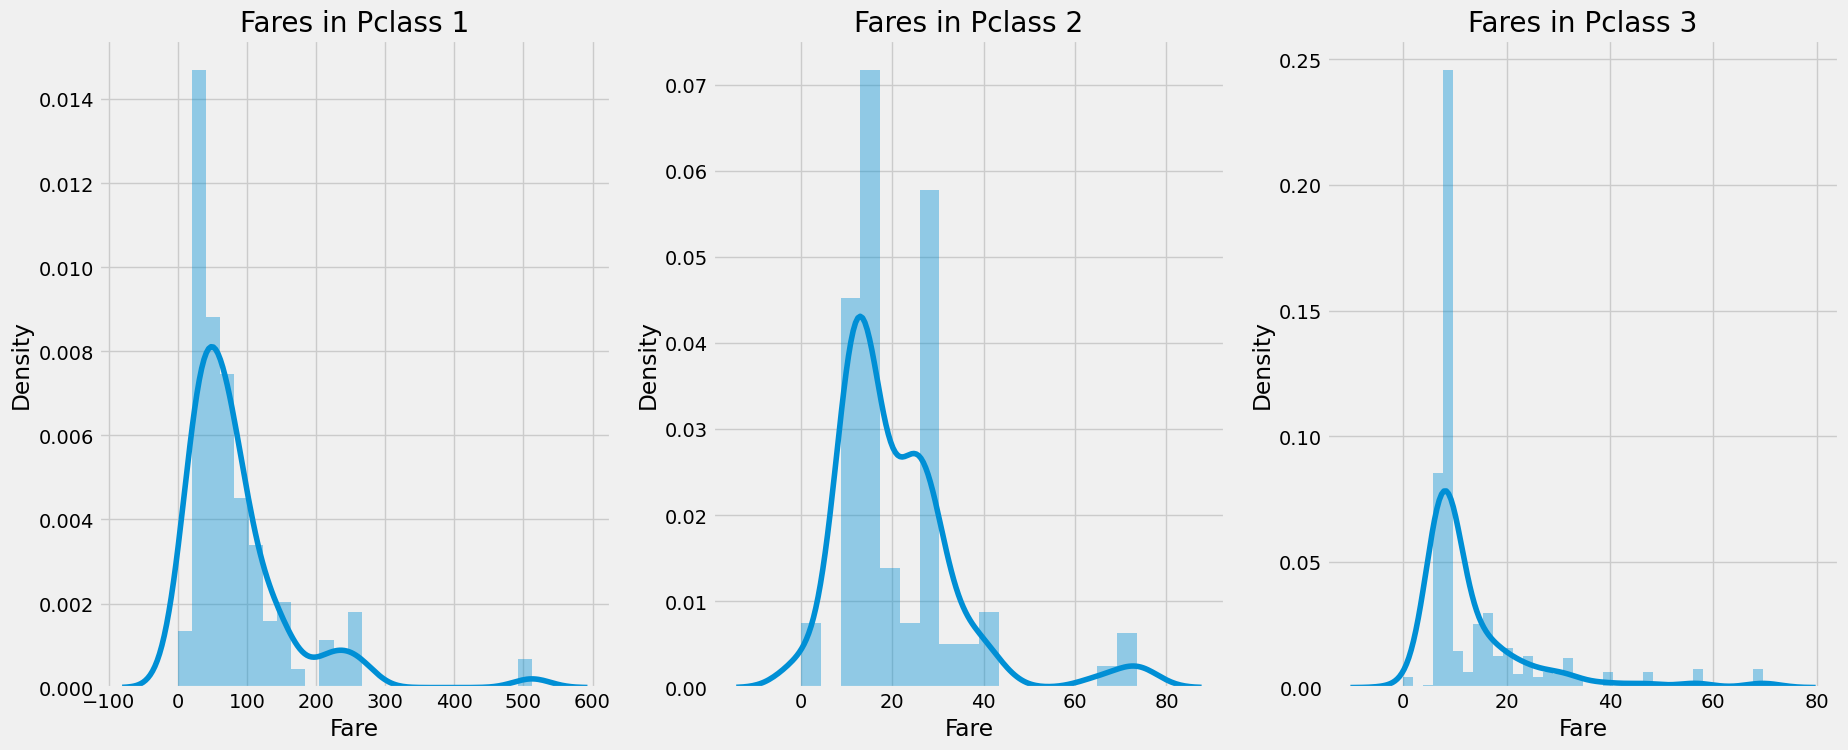

In [ ]:
# Pclass 1의 fare가 넓은 분포를 보임.
f, ax = plt.subplots(1, 3, figsize=(20, 8))
sns.distplot(data[data['Pclass']==1].Fare, ax=ax[0])
ax[0].set_title('Fares in Pclass 1')
sns.distplot(data[data['Pclass']==2].Fare, ax=ax[1])
ax[1].set_title('Fares in Pclass 2')
sns.distplot(data[data['Pclass']==3].Fare, ax=ax[2])
ax[2].set_title('Fares in Pclass 3')

**Correlation between (numeric) features**

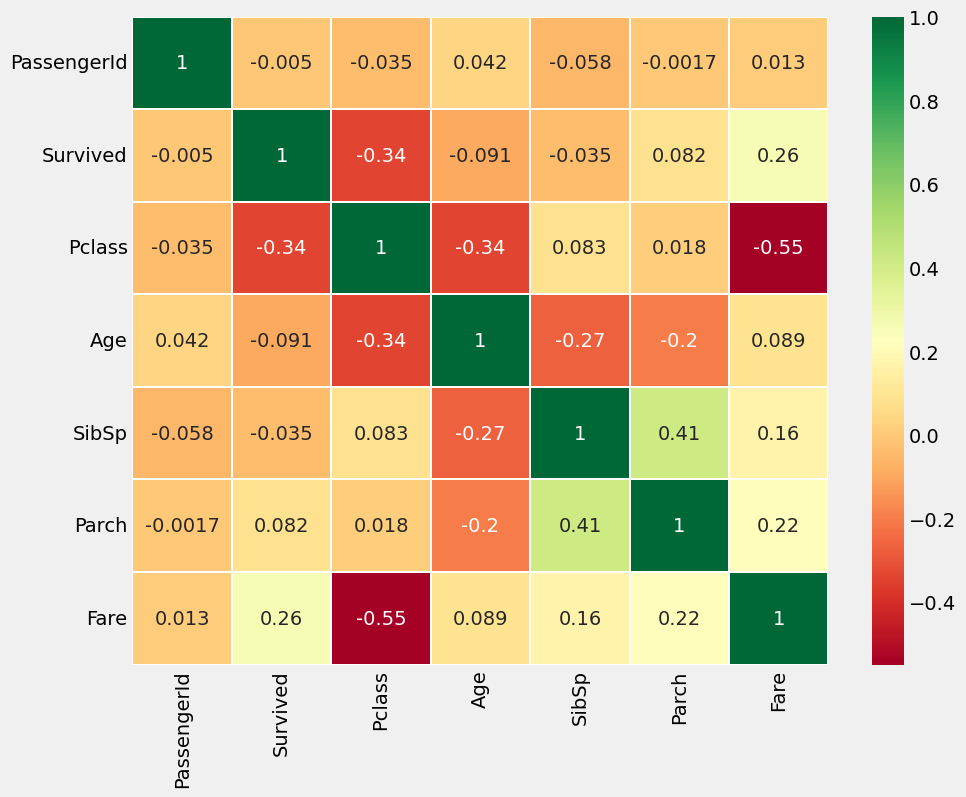

In [ ]:
numeric_data = data.select_dtypes(include=['float64', 'int64'])
sns.heatmap(numeric_data.corr(), annot=True, cmap='RdYlGn', linewidths=0.2)
fig = plt.gcf()
fig.set_size_inches(10, 8)
plt.show()

- SibSp과 Parch가 0.41로 제일 높은 correlation을 보임.
- Features들 간의 correlation이 매우 높으면 (**MultiColinearity**) feature들이 담는 정보가 거의 같다고 보아, 모델링을 할 때 training time을 줄이기 위해 feature 중 하나가 redundant하다고 보고 제거함.

## Part 2 : Feature Engineering and Data Cleaning

: Add, eliminate, transform the existing features to suitable form for predictive modeling

- Continuous (numeric) values -> Discrete (numeric) values

   : Convert by binning or normalization
    - Age -> Age_band
    - Fare -> Fare_cat

- Creating new features
    - Parch + SibSp -> Family_Size
    - Family_Size==0: Alone

- Encoding : String (categorical) values -> Numeric (discrete) values
    - Sex, Embarked, Initial

- Dropping unneeded features
    - String features that cannot be categorized
    - Name, Age, Ticket, Fare, Cabin, PassengerId

**Continuous to Discrete - 'Age'**

In [ ]:
# 최대 나이가 80, 크기가 16인 bin 5개로 범주화하기
data['Age_band'] = 0
data.loc[data['Age']<=16, 'Age_band'] = 0
data.loc[(data['Age']>16) & (data['Age']<=32), 'Age_band'] = 1
data.loc[(data['Age']>32) & (data['Age']<=48), 'Age_band'] = 2
data.loc[(data['Age']>48) & (data['Age']<=64), 'Age_band'] = 3
data.loc[(data['Age']>64), 'Age_band'] = 4
data.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Initial,Age_band
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,2


In [ ]:
# 각 age band에 속한 승객 명 수
data['Age_band'].value_counts().to_frame().style.background_gradient(cmap='summer_r')

,count
Age_band,
1,382
2,325
0,104
3,69
4,11


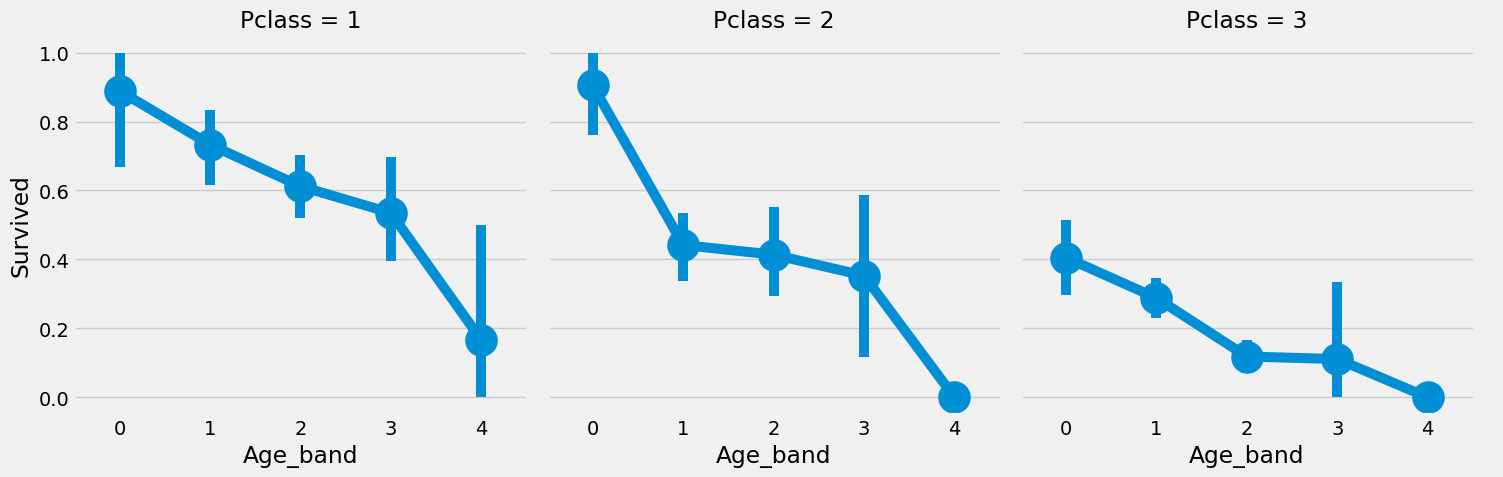

In [ ]:
# Pclass에 상관없이 나이대가 높아질수록 생존확률이 감소함.
sns.catplot(x='Age_band', y='Survived', col='Pclass', data=data, kind='point')
plt.show()

**Continuous to Discrete - 'Fare'**

In [ ]:
# pandas.qcut 이용하여 5 bins로 범주화
# Fare_Range increases, chances of survival increases.
data['Fare_Range'] = pd.qcut(data['Fare'], 4)
data.groupby('Fare_Range').Survived.mean().to_frame().style.background_gradient(cmap='summer_r')

,Survived
Fare_Range,
"(-0.001, 7.91]",0.197309
"(7.91, 14.454]",0.303571
"(14.454, 31.0]",0.454955
"(31.0, 512.329]",0.581081


In [ ]:
# Convert it into singleton values since we cannot pass the Fare_Range values as it is.
data['Fare_cat'] = 0
data.loc[data['Fare']<=7.91, 'Fare_cat'] = 0
data.loc[(data['Fare']>7.91)&(data['Fare']<=14.454), 'Fare_cat'] = 1
data.loc[(data['Fare']>14.454)&(data['Fare']<=31.0), 'Fare_cat'] = 2
data.loc[(data['Fare']>31.0)&(data['Fare']<=513), 'Fare_cat'] = 3
data.loc[data['Fare']>513, 'Fare_cat'] = 4

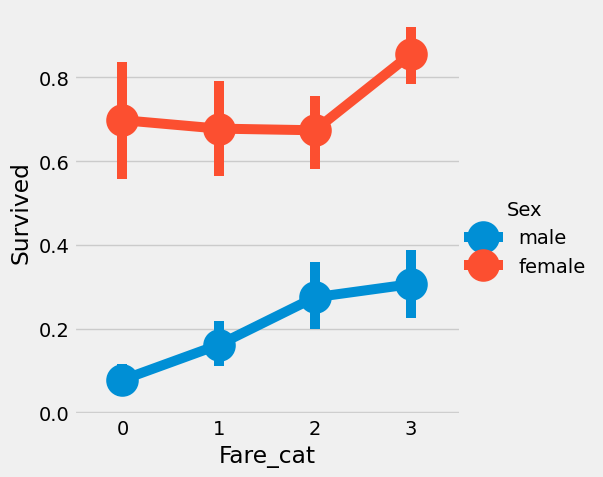

In [ ]:
# Fare may be an important feature during modeling along with Sex.
sns.catplot(x='Fare_cat', y='Survived', hue='Sex', data=data, kind='point')
plt.show()

**Creating new features - 'SibSp', 'Parch'**

In [ ]:
data['Family_Size'] = 0
data['Family_Size'] = data['SibSp'] + data['Parch']
data['Alone'] = 0
data.loc[data.Family_Size== 0, 'Alone'] = 1

data.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Initial,Age_band,Fare_Range,Fare_cat,Family_Size,Alone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,1,"(-0.001, 7.91]",0,1,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,2,"(31.0, 512.329]",3,1,0


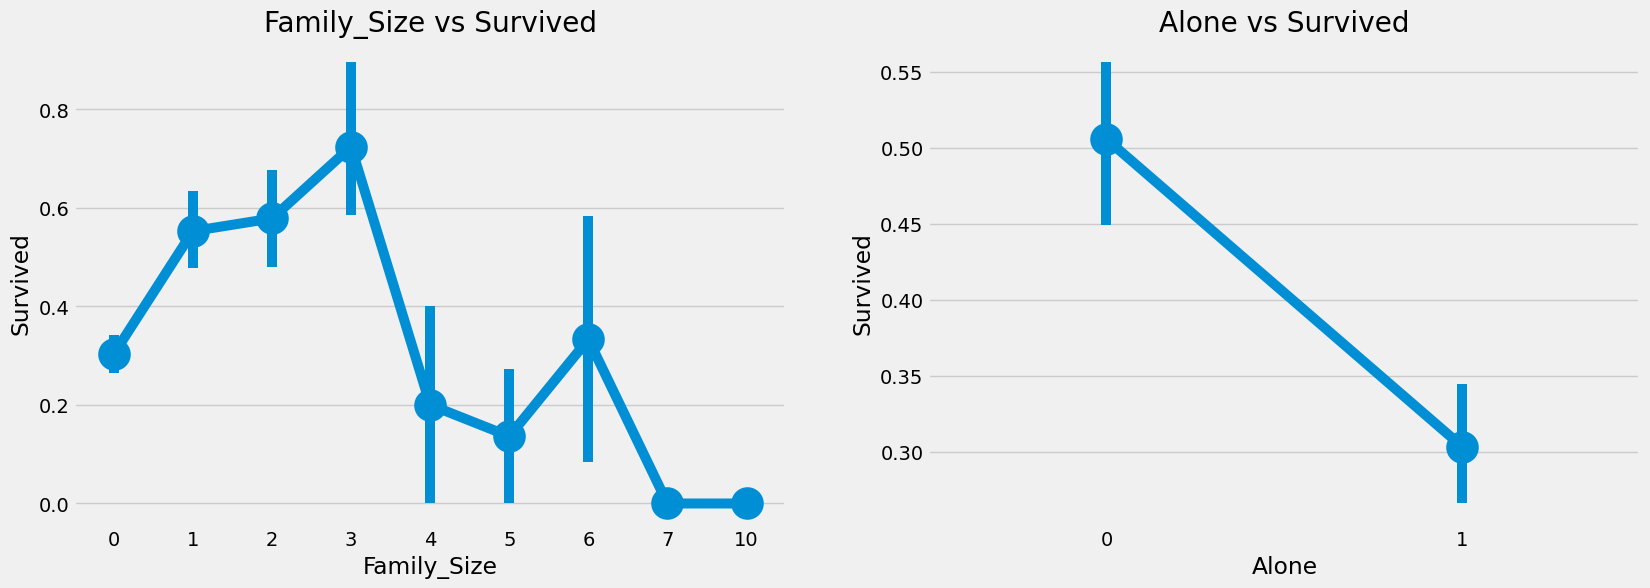

In [ ]:
# 혼자이거나 Family_Size>4이면 생존확률이 현저히 떨어짐.
# 이 feature들도 모델링에서 중요한 역할인듯 보임.
f, ax = plt.subplots(1, 2, figsize=(18,6))
sns.pointplot(x='Family_Size', y='Survived', data=data, ax=ax[0])
ax[0].set_title('Family_Size vs Survived')
sns.pointplot(x='Alone', y='Survived', data=data, ax=ax[1])
ax[1].set_title('Alone vs Survived')
plt.close(2)
plt.show()

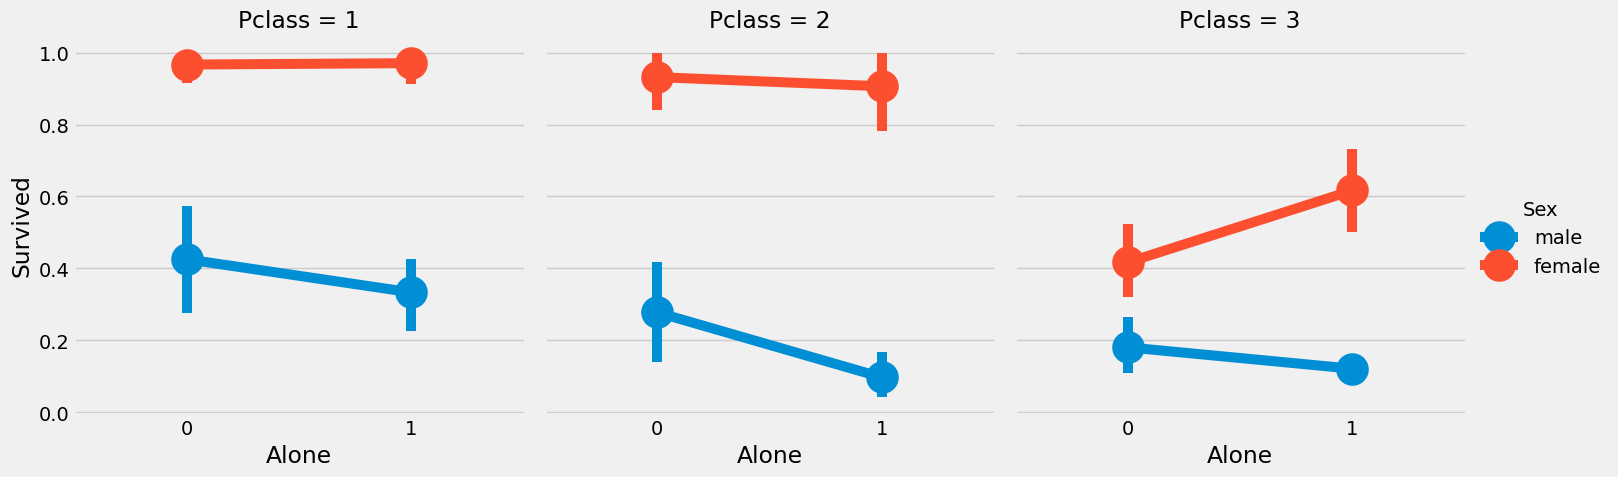

In [ ]:
# 특이하게 Pclass 3, female의 경우 혼자일 때 생존확률이 더 높았음.
sns.catplot(x='Alone', y='Survived', hue='Sex', col='Pclass', data=data, kind='point')
plt.show()

**String (categorical) to Numeric - 'Sex', 'Embarked', 'Initial'**

In [ ]:
data['Sex'].replace(['male', 'female'], [0, 1], inplace=True)
data['Embarked'].replace(['S', 'C', 'Q'], [0, 1, 2], inplace=True)
data['Initial'].replace(['Mr','Mrs','Miss','Master','Other'],[0, 1, 2, 3, 4], inplace=True)

**Dropping unneeded features**

In [ ]:
data.drop(['Name','Age','Ticket','Fare','Cabin','Fare_Range','PassengerId'], axis=1, inplace=True)

**New Correlation Heatmap between all features**

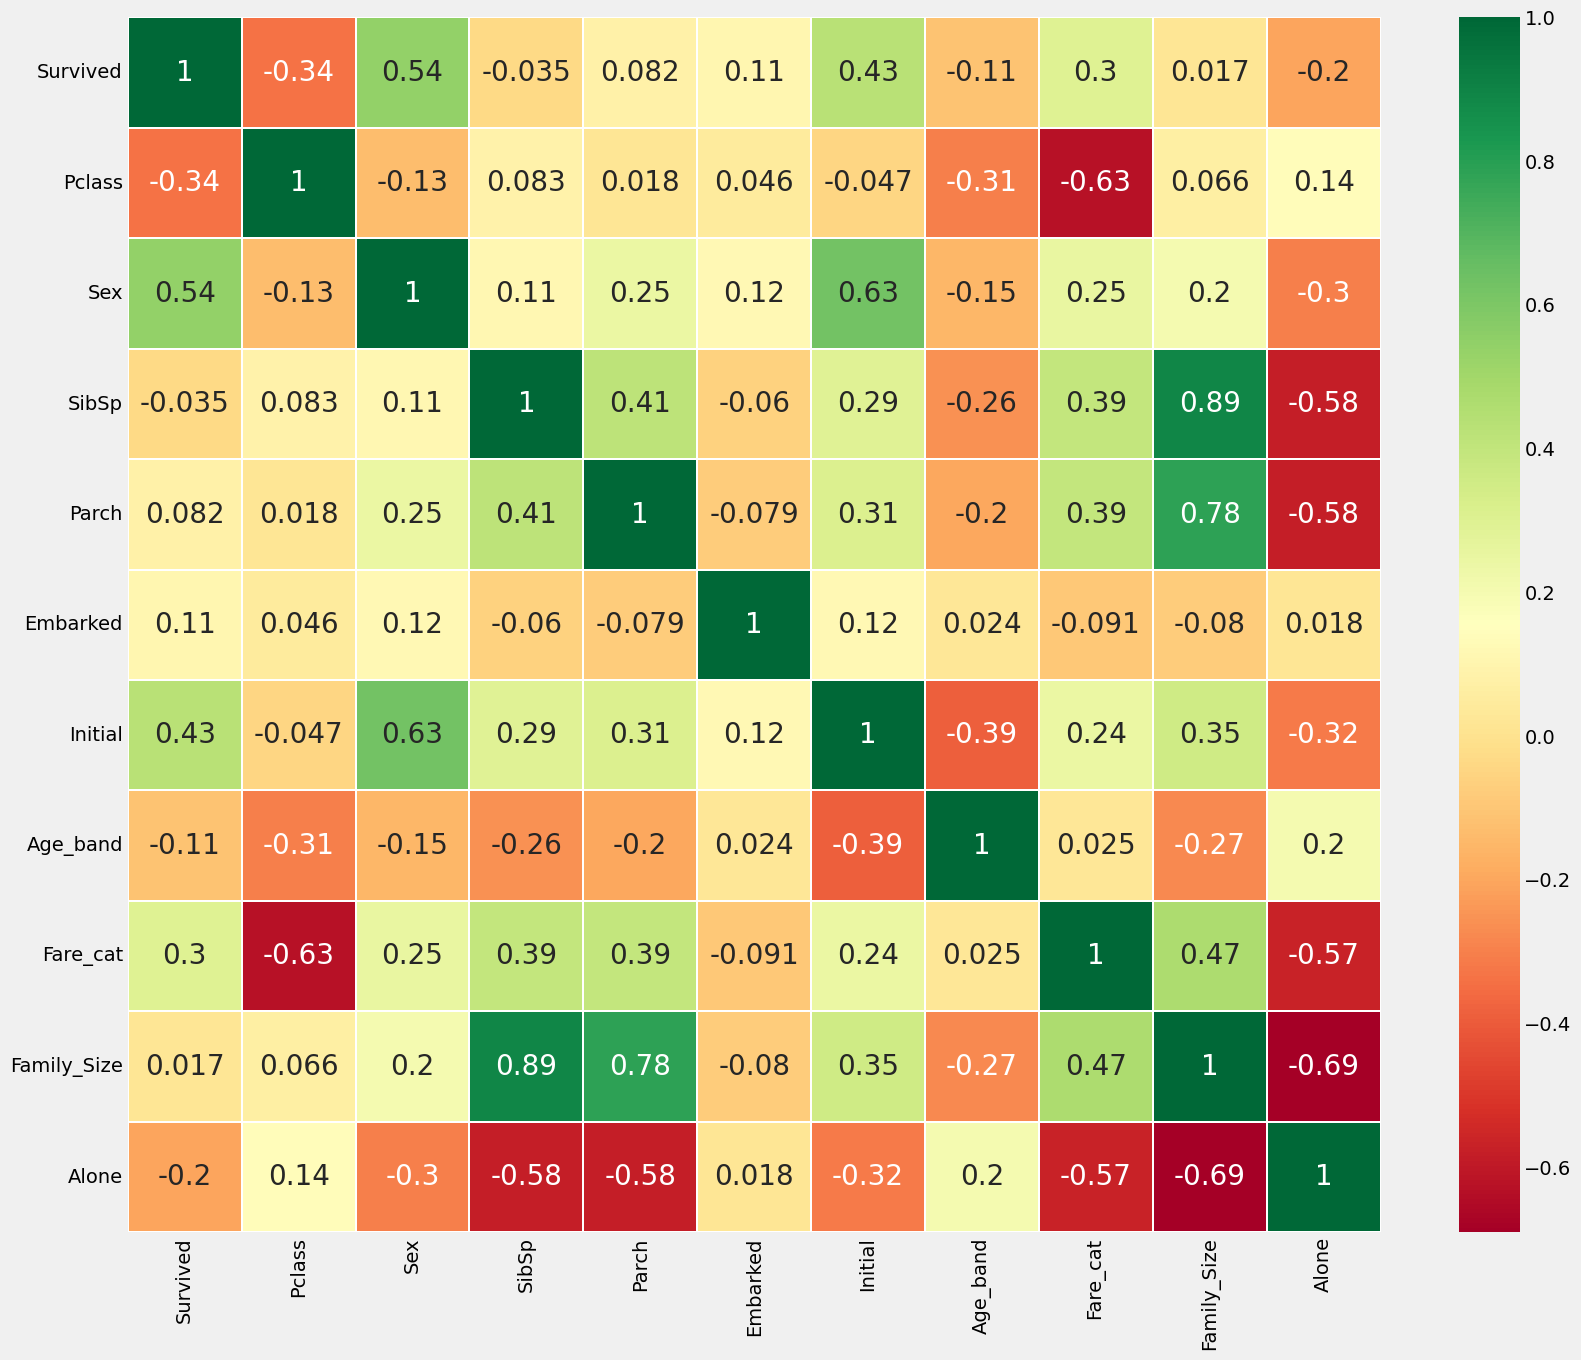

In [ ]:
sns.heatmap(data.corr(), annot=True, cmap='RdYlGn',linewidths=0.2,annot_kws={'size':20})
fig = plt.gcf()
fig.set_size_inches(18, 15)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

강한 상관관계를 가지는 (Pclass, Fare_cat) / (Family_Size, Alone, SibSp) / (Sex, Initial)은 각각 비슷한 정보를 담는다.

##Part 3 : Predictive Modeling

The following algorithms are used to make the model:
- Logistic Regression
- Support Vector Machines (linear and radical)
- Random Forest
- K-Nearest Neighbors
- Naive Bayes
- Decision Tree
- Logistic Regression


In [ ]:
# import all the required ML packages
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

In [ ]:
train, test = train_test_split(data, test_size=0.3, random_state=0, stratify=data['Survived'])
train_X = train[train.columns[1:]]
train_Y = train[train.columns[:1]]
test_X = test[test.columns[1:]]
test_Y = test[test.columns[:1]]
X = data[data.columns[1:]]
Y = data['Survived']

**Running basic algorithms**

In [ ]:
model = svm.SVC(kernel='rbf', C=1, gamma=0.1)
model.fit(train_X, train_Y)
prediction1 = model.predict(test_X)
print('Accuracy for rdf SVM is:', accuracy_score(test_Y, prediction1))

Accuracy for rdf SVM is: 0.835820895522388


In [ ]:
model = svm.SVC(kernel='linear', C=0.1, gamma=0.1)
model.fit(train_X, train_Y)
prediction2 = model.predict(test_X)
print('Accuracy for linear SVM is:', accuracy_score(test_Y, prediction2))

Accuracy for linear SVM is: 0.8171641791044776


In [ ]:
model = LogisticRegression()
model.fit(train_X, train_Y)
prediction3 = model.predict(test_X)
print('Accuracy for Logistic Regression is:', accuracy_score(test_Y, prediction3))

Accuracy for Logistic Regression is: 0.8134328358208955


In [ ]:
model = DecisionTreeClassifier()
model.fit(train_X, train_Y)
prediction4 = model.predict(test_X)
print('Accuracy for Decision Tree is:', accuracy_score(test_Y, prediction4))

Accuracy for Decision Tree is: 0.8059701492537313


In [ ]:
model = KNeighborsClassifier()
model.fit(train_X, train_Y)
prediction5 = model.predict(test_X)
print('Accuracy for KNN is:', accuracy_score(test_Y, prediction5))

Accuracy for KNN is: 0.8134328358208955


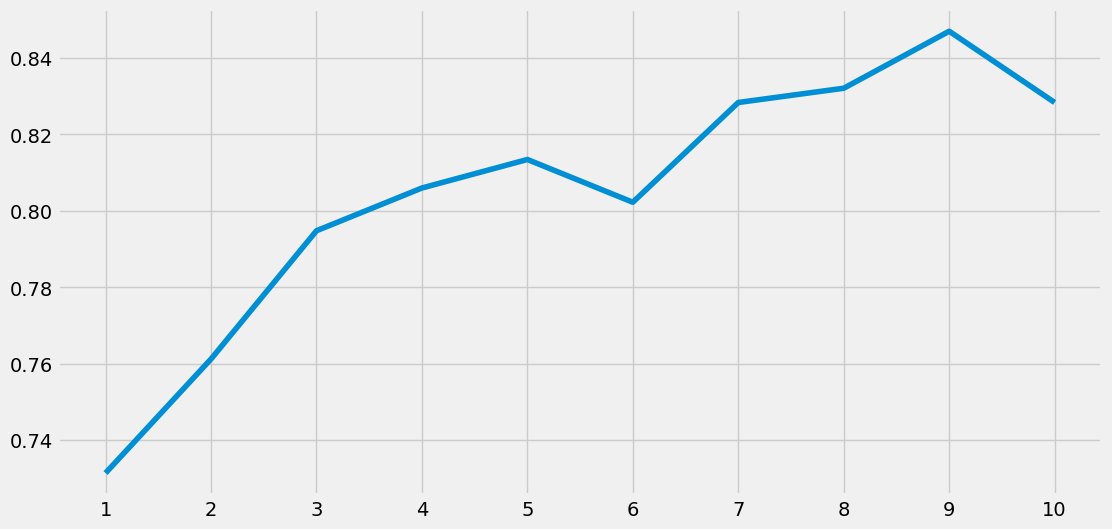

Accuracies for different values of n are: [0.73134328 0.76119403 0.79477612 0.80597015 0.81343284 0.80223881
 0.82835821 0.83208955 0.84701493 0.82835821] with the maximum value of 0.8470149253731343


In [ ]:
# Check how accuracies change over various values of parameter n_neighbors in KNN
a_index = list(range(1, 11))
a = []

for i in list(range(1, 11)):
  model = KNeighborsClassifier(n_neighbors=i)
  model.fit(train_X, train_Y)
  prediction = model.predict(test_X)
  accuracy = accuracy_score(test_Y, prediction)
  a.append(accuracy)

a = pd.Series(a, index=a_index)

plt.plot(a)
plt.xticks(a_index)
fig = plt.gcf()
fig.set_size_inches(12, 6)
plt.show()
print('Accuracies for different values of n are:', a.values, 'with the maximum value of', a.values.max())

In [ ]:
model = GaussianNB()
model.fit(train_X, train_Y)
prediction6 = model.predict(test_X)
print('Accuracy for Naive Bayes is:', accuracy_score(test_Y, prediction6))

Accuracy for Naive Bayes is: 0.8134328358208955


In [ ]:
model = RandomForestClassifier(n_estimators=100)
model.fit(train_X, train_Y)
prediction7 = model.predict(test_X)
print('Accuracy for Random Forest is:', accuracy_score(test_Y, prediction7))

Accuracy for Random Forest is: 0.8134328358208955


**Dividing train and test dataset with K-Fold Cross Validation**

In an unbalanced dataset, the accuracy of a model will change as the training and testing dataset changes. This is called **model variance**. To reduce this model variance, we divide the dataset into N parts and keep changing the testing part in each iteration and train the algorithm over the other parts. This way, we gain a generalized model as the algorithm sometimes underfit or sometimes overfit the data other training sets.

In [ ]:
from sklearn.model_selection import KFold, cross_val_score, cross_val_predict

kfold = KFold(n_splits=10, random_state=22, shuffle=True)
xyz = []
accuracy = []
std = []
classifiers = ['Linear Svm','Radial Svm','Logistic Regression','KNN','Decision Tree','Naive Bayes','Random Forest']
models = [svm.SVC(kernel='linear'), svm.SVC(kernel='rbf'), LogisticRegression(), KNeighborsClassifier(n_neighbors=9),
          DecisionTreeClassifier(), GaussianNB(), RandomForestClassifier(n_estimators=100)]

for i in models:
  model = i
  cv_result = cross_val_score(model, X, Y, cv=kfold, scoring='accuracy')
  xyz.append(cv_result.mean())
  std.append(cv_result.std())  # model variance
  accuracy.append(cv_result)

new_models_dataframe2 = pd.DataFrame({'CV mean':xyz, 'Std':std}, index=classifiers)
new_models_dataframe2

,CV mean,Std
Linear Svm,0.784607,0.057841
Radial Svm,0.828377,0.057096
Logistic Regression,0.799176,0.040154
KNN,0.808140,0.035630
Decision Tree,0.808102,0.043826
Naive Bayes,0.795843,0.054861
Random Forest,0.813733,0.045354


<Axes: >

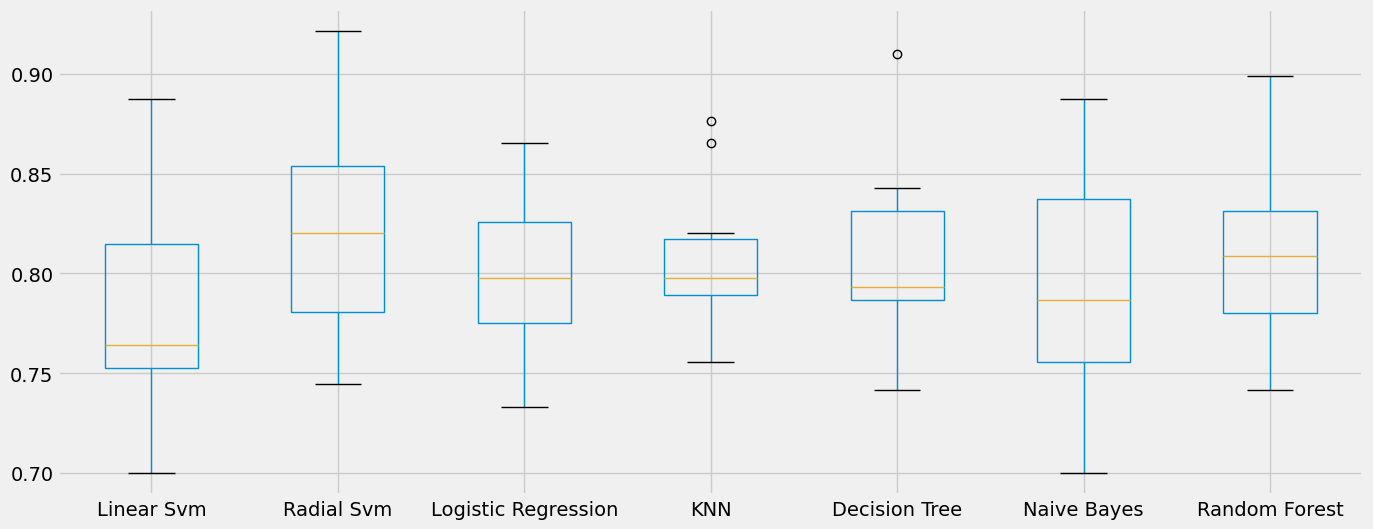

In [ ]:
plt.subplots(figsize=(15, 6))
box = pd.DataFrame(accuracy, index=classifiers)
box.T.boxplot()

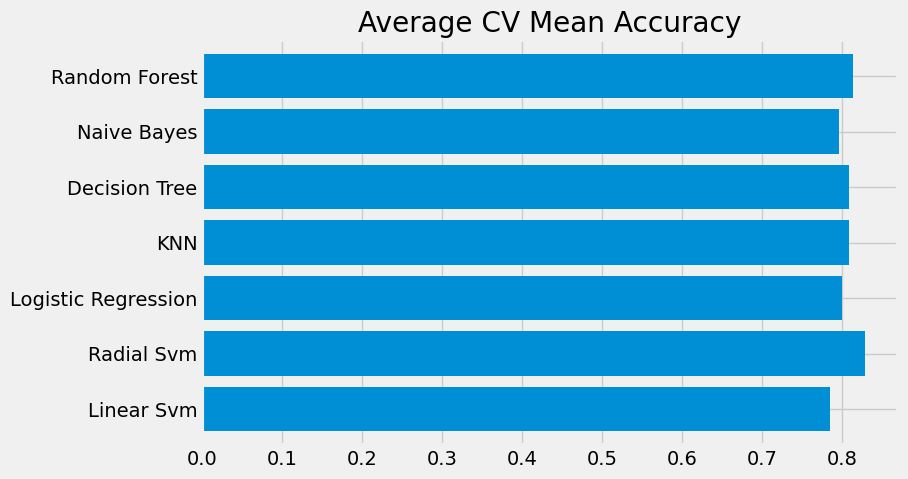

In [ ]:
new_models_dataframe2['CV mean'].plot.barh(width=0.8)
plt.title('Average CV Mean Accuracy')
fig = plt.gcf()
fig.set_size_inches(8, 5)
plt.show()

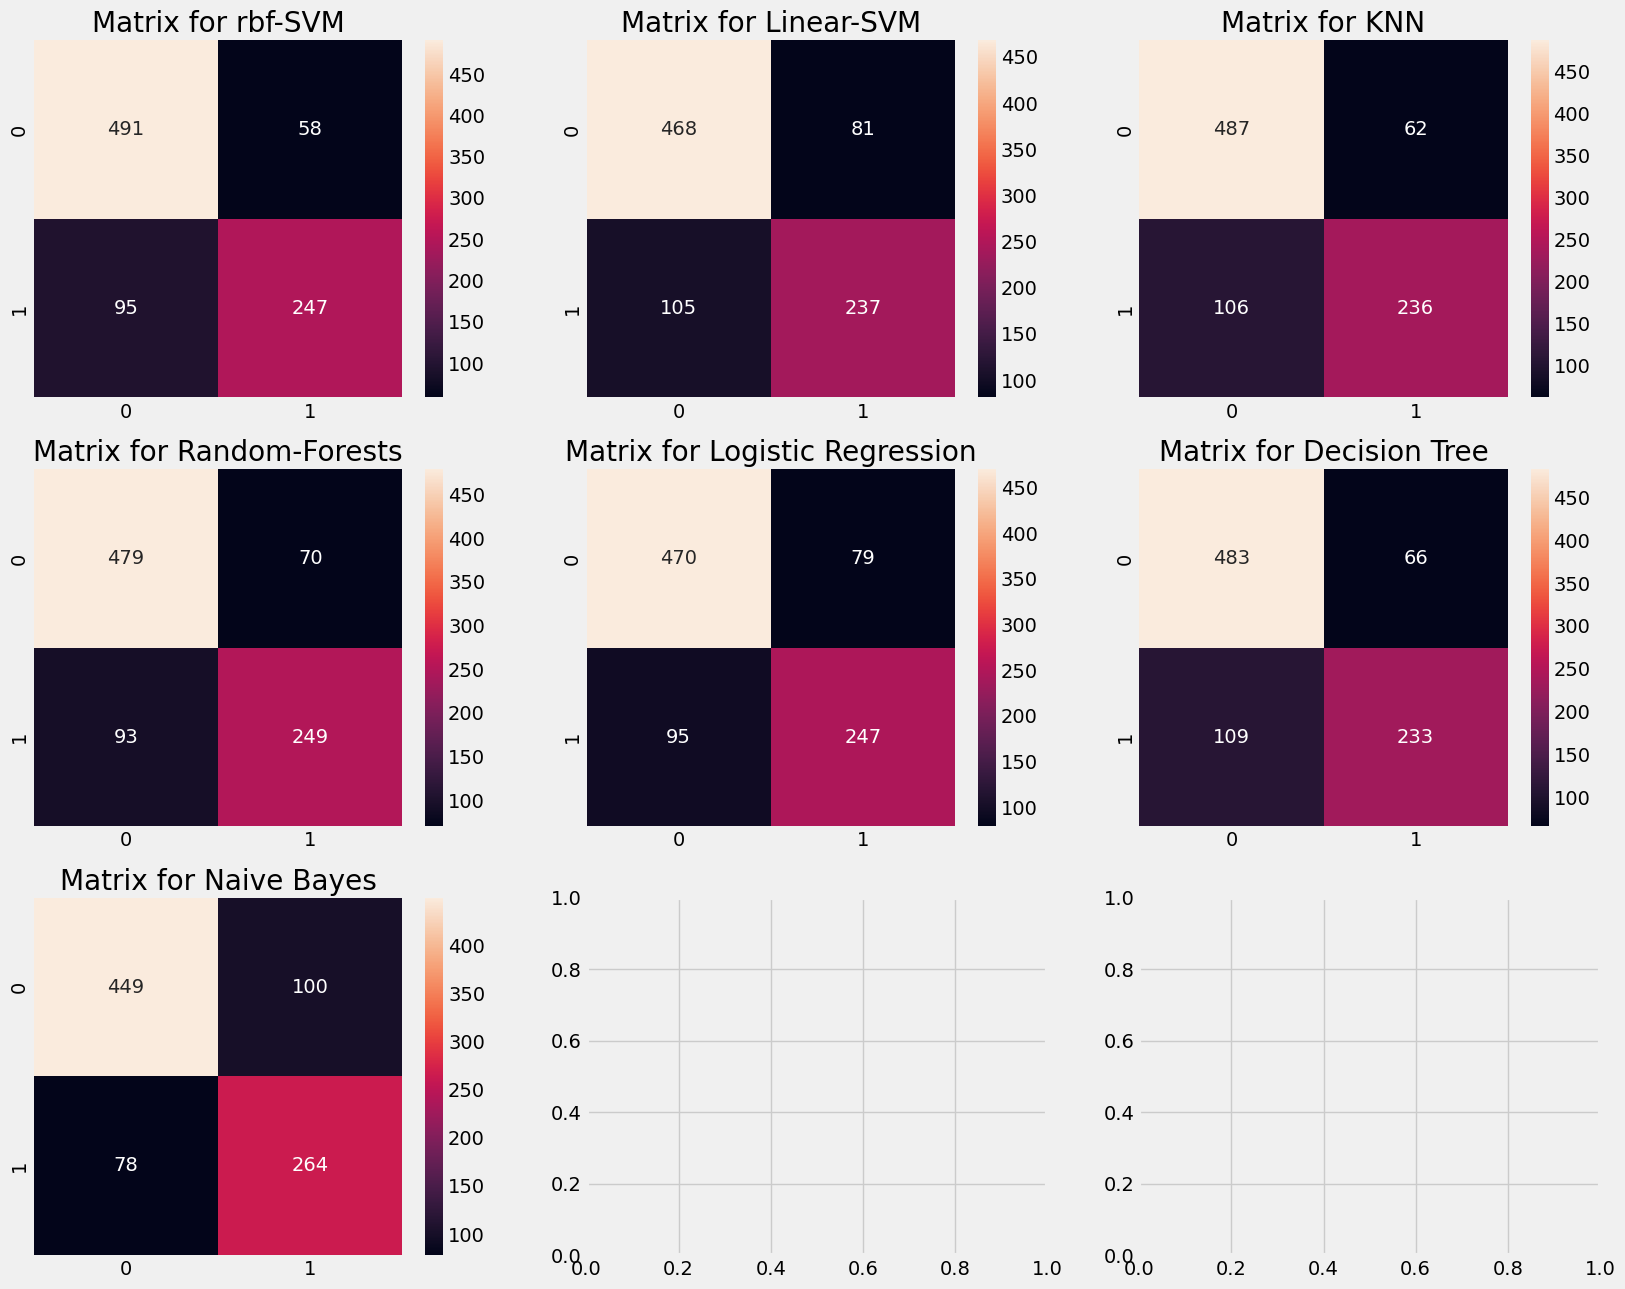

In [ ]:
# Creating a confusion matrix for each model
# rbf-SVM CV accuracy(Ratio of cases rightly predicted) : (491+247)/891 = 82.8%
# Errors: Wrongly classified 58 survived ppl as dead & 95 dead ppl as survived
# rbf-SVM has a higher chance in correctly predicting dead passengers, and
# NaiveBayes has a higher chance in correctly predicting passengers who survived.

f, ax = plt.subplots(3, 3, figsize=(18, 15))

y_pred = cross_val_predict(svm.SVC(kernel='rbf'), X, Y, cv=10)
sns.heatmap(confusion_matrix(Y,y_pred), ax=ax[0,0], annot=True, fmt='2.0f')
ax[0,0].set_title('Matrix for rbf-SVM')

y_pred = cross_val_predict(svm.SVC(kernel='linear'), X, Y, cv=10)
sns.heatmap(confusion_matrix(Y,y_pred), ax=ax[0,1], annot=True, fmt='2.0f')
ax[0,1].set_title('Matrix for Linear-SVM')

y_pred = cross_val_predict(KNeighborsClassifier(n_neighbors=9), X, Y, cv=10)
sns.heatmap(confusion_matrix(Y,y_pred), ax=ax[0,2], annot=True, fmt='2.0f')
ax[0,2].set_title('Matrix for KNN')

y_pred = cross_val_predict(RandomForestClassifier(n_estimators=100), X, Y, cv=10)
sns.heatmap(confusion_matrix(Y,y_pred), ax=ax[1,0], annot=True, fmt='2.0f')
ax[1,0].set_title('Matrix for Random-Forests')

y_pred = cross_val_predict(LogisticRegression(), X, Y, cv=10)
sns.heatmap(confusion_matrix(Y,y_pred), ax=ax[1,1], annot=True, fmt='2.0f')
ax[1,1].set_title('Matrix for Logistic Regression')

y_pred = cross_val_predict(DecisionTreeClassifier(), X, Y, cv=10)
sns.heatmap(confusion_matrix(Y,y_pred), ax=ax[1,2], annot=True, fmt='2.0f')
ax[1,2].set_title('Matrix for Decision Tree')

y_pred = cross_val_predict(GaussianNB(), X, Y, cv=10)
sns.heatmap(confusion_matrix(Y,y_pred), ax=ax[2,0], annot=True, fmt='2.0f')
ax[2,0].set_title('Matrix for Naive Bayes')

plt.subplots_adjust(hspace=0.2, wspace=0.2)
plt.show()

In [ ]:
# Hyper-Parameters Tuning for the two best classifiers using GridSearchCV: SVM and RandomForest
from sklearn.model_selection import GridSearchCV

C = [0.05, 0.1, 0.2, 0.25, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
gamma = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
kernel = ['rbf', 'linear']
hyper = {'kernel': kernel, 'C': C, 'gamma': gamma}

gd = GridSearchCV(estimator=svm.SVC(), param_grid=hyper, verbose=True)
gd.fit(X, Y)
print(gd.best_score_)
print(gd.best_estimator_)

Fitting 5 folds for each of 240 candidates, totalling 1200 fits
0.8282593685267716
SVC(C=0.4, gamma=0.3)


In [ ]:
n_estimators = range(100, 1000, 100)
hyper = {'n_estimators': n_estimators}

gd = GridSearchCV(estimator=RandomForestClassifier(random_state=0), param_grid=hyper, verbose=True)
gd.fit(X, Y)
print(gd.best_score_)
print(gd.best_estimator_)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
0.82045069361622
RandomForestClassifier(n_estimators=400, random_state=0)


**Ensembling**

: Combination of various simple models to create a single powerful model
- Voting Classifier
     - Base model(submodel): all different types
     - Gives an average prediction result based on the prediction of all the submodels
- Bagging
     - Apply similiar classifiers on small partitions of the dataset, then average all the predictions
     - Works best with models with high variance, like Decision Tree or Random Forests or KNN(with small value of n_neighbors)
- Boosting
     - Step-by-step enhancement of a weak model
     - e.g. Adaptative Boosting, Stochastic Gradient Boosting, XGBoost


- **Voting Classifier**

In [ ]:
from sklearn.ensemble import VotingClassifier

ensemble_lin_rbf = VotingClassifier(estimators=[('KNN', KNeighborsClassifier(n_neighbors=10)),
                                              ('RBF', svm.SVC(probability=True, kernel='rbf', C=0.5, gamma=0.1)),
                                              ('RFor', RandomForestClassifier(n_estimators=500, random_state=0)),
                                              ('LR', LogisticRegression(C=0.05)),
                                              ('DT', DecisionTreeClassifier(random_state=0)),
                                              ('NB', GaussianNB()),
                                              ('svm', svm.SVC(kernel='linear', probability=True))],
                                    voting='soft').fit(train_X, train_Y)

print('The accuracy for ensembled model is:', ensemble_lin_rbf.score(test_X, test_Y))

print('The cross validated score is:', cross_val_score(ensemble_lin_rbf, X, Y, cv=10, scoring='accuracy').mean())

The accuracy for ensembled model is: 0.8171641791044776
The cross validated score is: 0.8260424469413234


- **Bagging**

In [ ]:
# Bagged KNN
from sklearn.ensemble import BaggingClassifier

model = BaggingClassifier(KNeighborsClassifier(n_neighbors=3), random_state=0, n_estimators=700)
model.fit(train_X, train_Y)
prediction = model.predict(test_X)

print('The accuracy for bagged KNN is:', accuracy_score(test_Y, prediction))
print('The cross validated scored for bagged KNN is:', cross_val_score(model, X, Y, cv=10, scoring='accuracy').mean())

The accuracy for bagged KNN is: 0.832089552238806
The cross validated scored for bagged KNN is: 0.8104244694132333


In [ ]:
# Bagged DecisionTree
model = BaggingClassifier(DecisionTreeClassifier(), random_state=0, n_estimators=100)
model.fit(train_X, train_Y)
prediction = model.predict(test_X)

print('The accuracy for bagged DecisionTree is:', accuracy_score(test_Y, prediction))
print('The cross validated score for bagged DecisionTree is:', cross_val_score(model, X, Y, cv=10, scoring='accuracy').mean())

The accuracy for bagged DecisionTree is: 0.8171641791044776
The cross validated score for bagged DecisionTree is: 0.8171410736579275


- **Boosting**

In [ ]:
# AdaBoost(Adaptative Boosting)
from sklearn.ensemble import AdaBoostClassifier

ada = AdaBoostClassifier(n_estimators=200, random_state=0, learning_rate=0.1)
result = cross_val_score(ada, X, Y, cv=10, scoring='accuracy')
print('The cross validated score for AdaBoost is:', result.mean())

The cross validated score for AdaBoost is: 0.8249188514357055


In [ ]:
# GradientBoosting(Stochastic Gradient Boosting)
from sklearn.ensemble import GradientBoostingClassifier

grad = GradientBoostingClassifier(n_estimators=500, random_state=0, learning_rate=0.1)
result = cross_val_score(grad, X, Y, cv=10, scoring='accuracy')
print('The cross validated score for GradientBoosting is:', result.mean())

The cross validated score for GradientBoosting is: 0.8115230961298376


In [ ]:
# XGBoost
from xgboost import XGBClassifier

xgboost = XGBClassifier(n_estimators=900, learning_rate=0.1)
result = cross_val_score(xgboost, X, Y, cv=10, scoring='accuracy')
print('The cross validated score for XGBoost is:', result.mean())

The cross validated score for XGBoost is: 0.8160299625468165


*** AdaBoost had the highest accuracy among the ensemble models.**

In [ ]:
# Hyperparameter tuning for AdaBoost
n_estimators = list(range(100, 1100, 100))
learn_rate = [0.05, 0.1, 0.2, 0.25, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
hyper = {'n_estimators': n_estimators, 'learning_rate': learn_rate}

gd = GridSearchCV(AdaBoostClassifier(), param_grid=hyper, verbose=True)
gd.fit(X, Y)

print(gd.best_score_)
print(gd.best_estimator_)

Fitting 5 folds for each of 120 candidates, totalling 600 fits
0.8293892411022534
AdaBoostClassifier(learning_rate=0.1, n_estimators=100)


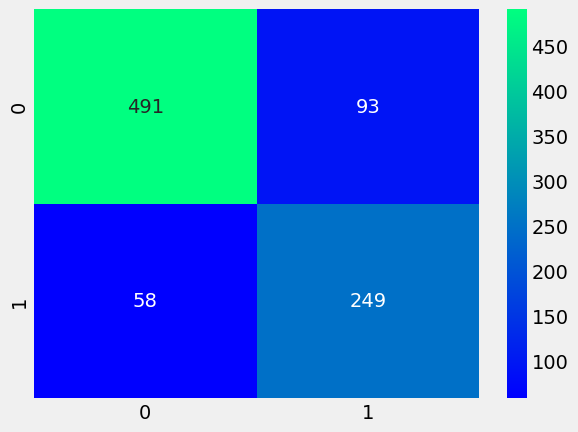

In [ ]:
# Confusion matrix of the tuned AdaBoost model (best model)
ada = AdaBoostClassifier(n_estimators=100, random_state=0, learning_rate=0.1)
result = cross_val_predict(ada, X, Y, cv=10)
sns.heatmap(confusion_matrix(result, Y), cmap='winter', annot=True, fmt='2.0f')
plt.show()

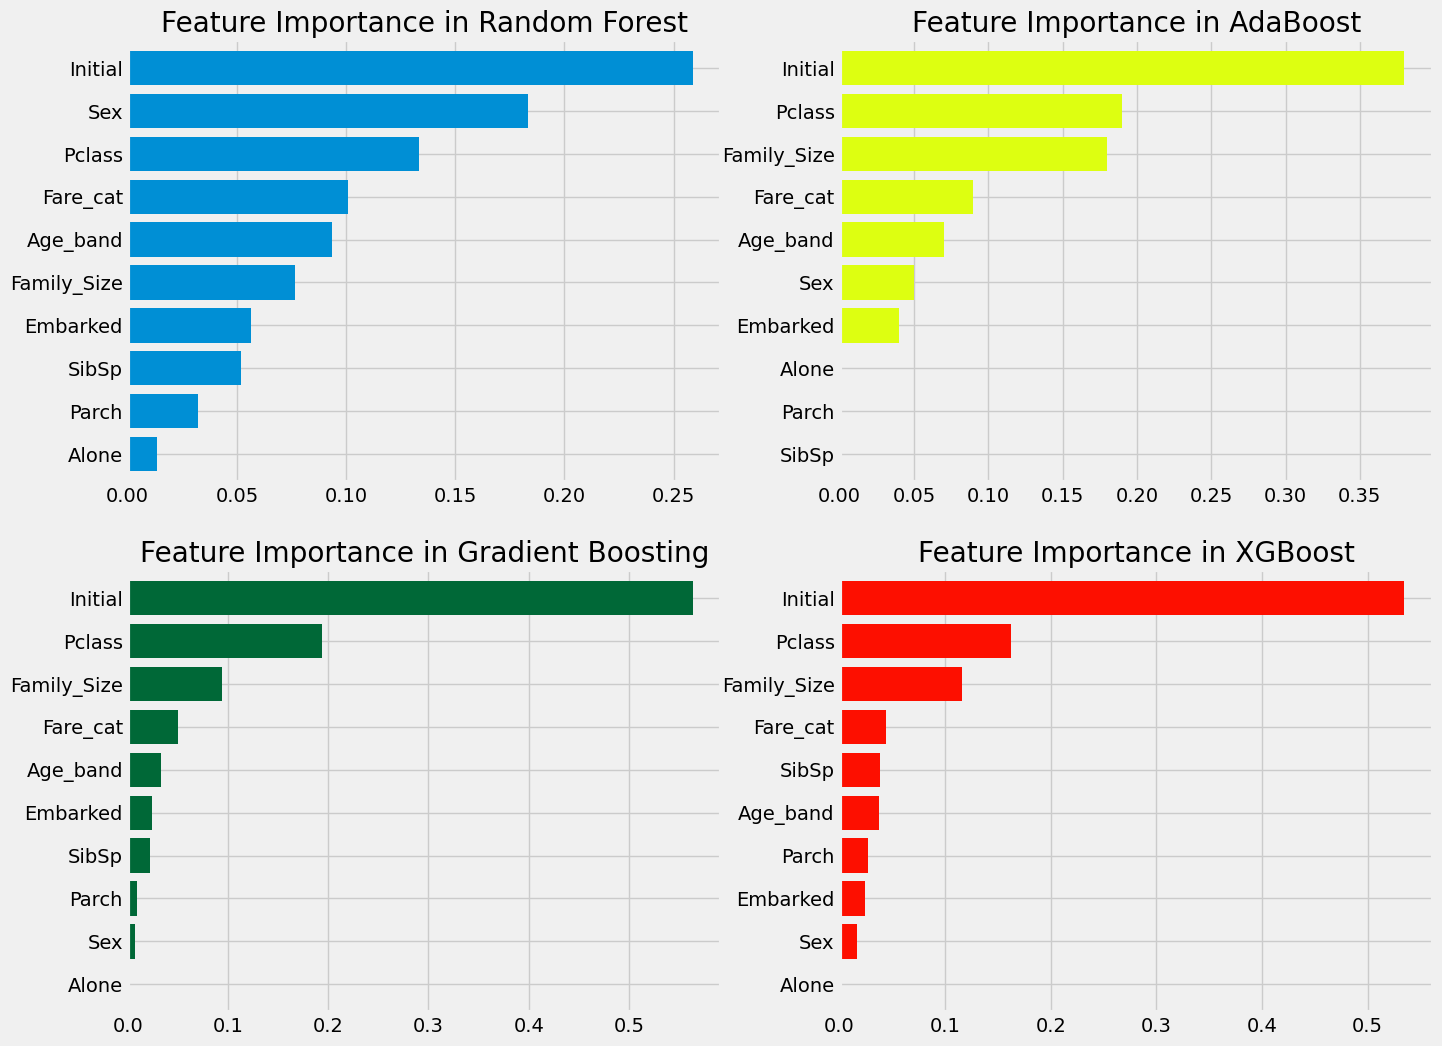

In [ ]:
# Feature Importances of some models
f, ax = plt.subplots(2, 2, figsize=(15, 12))

model = RandomForestClassifier(n_estimators=400, random_state=0)
model.fit(X, Y)
pd.Series(model.feature_importances_, X.columns).sort_values(ascending=True).plot.barh(width=0.8, ax=ax[0,0])
ax[0,0].set_title('Feature Importance in Random Forest')

model = AdaBoostClassifier(n_estimators=100, learning_rate=0.1, random_state=0)
model.fit(X, Y)
pd.Series(model.feature_importances_, X.columns).sort_values(ascending=True).plot.barh(width=0.8, color='#ddff11', ax=ax[0,1])
ax[0,1].set_title('Feature Importance in AdaBoost')

model = GradientBoostingClassifier(n_estimators=500, learning_rate=0.1, random_state=0)
model.fit(X, Y)
pd.Series(model.feature_importances_, X.columns).sort_values(ascending=True).plot.barh(width=0.8, cmap='RdYlGn_r', ax=ax[1,0])
ax[1,0].set_title('Feature Importance in Gradient Boosting')

model = XGBClassifier(n_estimators=900, learning_rate=0.1)
model.fit(X, Y)
pd.Series(model.feature_importances_, X.columns).sort_values(ascending=True).plot.barh(width=0.8, color='#FD0F00', ax=ax[1,1])
ax[1,1].set_title('Feature Importance in XGBoost')

plt.show()

Observations:

- Some of the common important features include: Initial, Pclass, Family_Size, Fare_cat
- 위의 correlation heatmap에서 Survived과 Sex 피처가 강한 상관관계를 나타냈는데, 오직 RandomForest에서만 Sex feature가 중요하게 반영된 점이 신기했다. 다만, Initial 피처와 Sex 피처가 강한 양의 상관관계를 가지기 때문에 두 피처 모두 성별을 나타낸다고 볼 수 있다.
- 비슷하게 Pclass와 Fare_cat는 승객들의 경제적 지위를 나타내고 Family_Size, Alone, Parch, SipSp가 비슷한 정보를 가진다.